In [ ]:
pip install wbgapi                        #World Bank data loader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install folium package
!pip install folium --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.6 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [ ]:
import gdown                              #Download data from google drive
import pickle                             #
import matplotlib.colors as mc            #
import matplotlib.pyplot as plt           #
import math                               #
import numpy as np                        #Series processing
import re                                 #Regular expressions
import pandas as pd                       #Dataframe processing
import seaborn as sns                     #Data plotting
from matplotlib.cm import ScalarMappable  #
import wbgapi as wb                       #World Bank data loader
from mpl_toolkits.mplot3d import axes3d
import folium
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

# EDA dataset 1: Berkeley's dataset

The database, developed by the Berkeley Carbon Trading Project in collaboration with Carbon Direct, contains all carbon offset projects, credit issuances, and credit retirements listed globally by four major voluntary offset project registries—Climate Action Reserve (CAR), American Carbon Registry (ACR), Verra (VCS), and Gold Standard. These four registries generate almost all of the world's voluntary market offsets and also include projects eligible for use under the California / Quebec linked cap-and-trade programs \

This database is meant to increase the transparency of the carbon offset market, providing researchers and offset buyers with the ability to better see offset credits and projects in a single database. Dynamic charts and tools allow users to see trends over time, and explore the projects and credits on the market by location, type, registry, etc \

> [source dataset](https://gspp.berkeley.edu/faculty-and-impact/centers/cepp/projects/berkeley-carbon-trading-project/offsets-database)




In [ ]:
# Here the Berkeley's datasource is loaded. It contains preprocessed data from excel file
# Download the data from this link 
# vrod_v1_2021.pkl
# https://drive.google.com/file/d/1F4y4pz2twv-6NURCkCHMPivDykaHWUqR/view?usp=sharing

url = 'https://drive.google.com/u/0/uc?id=1F4y4pz2twv-6NURCkCHMPivDykaHWUqR&export=download'
output = 'vrod_v1_2021.pkl'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1F4y4pz2twv-6NURCkCHMPivDykaHWUqR&export=download
To: /content/vrod_v1_2021.pkl
100%|██████████| 60.3M/60.3M [00:00<00:00, 115MB/s]


'vrod_v1_2021.pkl'

In [ ]:
with open('vrod_v1_2021.pkl', 'rb') as data_file_name:
    data_with_sheet_name = pickle.load(data_file_name)

In [ ]:
data_by_sheet_name = {i['sheet_name']:i['data'] for i in data_with_sheet_name}

In [ ]:
# Code used to print the different Excel workbook sheets loaded
print('Sheets names: ')
for i in data_by_sheet_name.keys():
  print(i)

Sheets names: 
PROJECTS
Column Descriptions
ACR Projects
ACR Issuances
ACR Retirements
ACR Cancellations
CAR Projects
CAR Issuances
CAR Retirements
CAR Cancellations
Gold Projects
Gold Issuances
Gold Retirements
VCS Projects
VCS Vintage Issuances
VCS Issuances & Retirements
VCS-ARB Projects
ARB Issuances & Retirements


In [ ]:
# Assign "PROJECTS" Excel sheet as variable "projects_df"
projects_df = data_by_sheet_name['PROJECTS']
projects_df.head(5)

Project ID                                       Project Name  \
0     ACR101                                     AFOVERT Energy   
1     ACR102                           Air Bag Gas Substitution   
2     ACR103                Inland Empire Anaerobic Ag Digester   
3     ACR104  Ankotrofotsy Community-based Reforestation & C...   
4     ACR105                                      Boa Vista A/R   

  Voluntary Registry ARB \nProject Voluntary Status                  Scope  \
0                ACR            No         Canceled  Household & Community   
1                ACR            No        Completed     Chemical Processes   
2                ACR            No        Completed            Agriculture   
3                ACR            No         Inactive    Forestry & Land Use   
4                ACR            No        Completed    Forestry & Land Use   

                          Type  Reduction / Removal Methodology / Protocol  \
0                   Cookstoves            Reduction                    NaN   
1              SF6 Replacement            Reduction                    NaN   
2      Manure Methane Digester            Reduction                    NaN   
3  Afforestation/Reforestation  Impermanent Removal                    NaN   
4  Afforestation/Reforestation  Impermanent Removal                    NaN   

               Region  ... 2015.3 2016.3 2017.3 2018.3  2019.3  2020.3  \
0  Sub Saharan Africa  ...      0      0      0      0       0       0   
1       North America  ...      0      0      0      0       0       0   
2       North America  ...      0      0      0      0       0       0   
3  Sub Saharan Africa  ...      0      0      0      0       0       0   
4       South America  ...      0      0      0      0       0       0   

   2021.3  Notes from Registry  Notes from Berkeley Carbon Trading Project  \
0       0                  NaN                                         NaN   
1       0                  NaN                                         NaN   
2       0                  NaN                                         NaN   
3       0                  NaN                                         NaN   
4       0                  NaN                                         NaN   

   Date added to database  
0               v1 4-2021  
1               v1 4-2021  
2               v1 4-2021  
3               v1 4-2021  
4               v1 4-2021  

[5 rows x 141 columns]

In the sheet Projects you will find all the information of the projects, the other sheets show the project separate by **'Voluntary Registry'** \

We will answer the next questions:

In [ ]:
# How big is the dataset?
projects_df.shape

(5890, 141)

In [ ]:
projects_df.dropna(axis=1, how = 'all', inplace=True)
projects_df.shape

(5890, 141)

In [ ]:
projects_df.describe()

Total Credits \nIssued  Total Credits \nRetired  \
count            5.890000e+03             5.890000e+03   
mean             2.471529e+05             1.317555e+05   
std              1.261407e+06             6.721587e+05   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             0.000000e+00   
50%              1.811800e+04             0.000000e+00   
75%              1.134568e+05             5.757075e+04   
max              3.362562e+07             1.907358e+07   

       Total Credits Remaining  First Year of Project         1996  \
count             5.890000e+03            3536.000000  5890.000000   
mean              1.153974e+05            2012.633767     0.129711   
std               7.272326e+05               4.406011     9.954873   
min              -8.007300e+04            1996.000000     0.000000   
25%               0.000000e+00            2009.000000     0.000000   
50%               0.000000e+00            2013.000000     0.000000   
75%               3.090925e+04            2016.000000     0.000000   
max               2.502639e+07            2021.000000   764.000000   

              1997          1998          1999           2000           2001  \
count  5890.000000   5890.000000   5890.000000    5890.000000    5890.000000   
mean      0.272496      8.611885     13.222920     190.533956     233.307810   
std      20.913051    636.676057    976.646941   13005.798710    9909.063459   
min       0.000000      0.000000      0.000000       0.000000       0.000000   
25%       0.000000      0.000000      0.000000       0.000000       0.000000   
50%       0.000000      0.000000      0.000000       0.000000       0.000000   
75%       0.000000      0.000000      0.000000       0.000000       0.000000   
max    1605.000000  48826.000000  74895.000000  991518.000000  718342.000000   

       ...        2012.3        2013.3        2014.3        2015.3  \
count  ...  5.890000e+03  5.890000e+03  5.890000e+03  5.890000e+03   
mean   ...  1.235073e+04  1.285683e+04  9.980937e+03  1.127031e+04   
std    ...  1.316146e+05  1.728014e+05  1.029859e+05  1.125108e+05   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    ...  4.865137e+06  9.015685e+06  5.772071e+06  4.451645e+06   

             2016.3        2017.3        2018.3        2019.3        2020.3  \
count  5.890000e+03  5.890000e+03  5.890000e+03  5.890000e+03  5.890000e+03   
mean   1.219048e+04  2.630861e+04  1.872395e+04  3.068018e+04  3.718677e+04   
std    2.075818e+05  4.069174e+05  1.980030e+05  3.475961e+05  2.676227e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.345375e+07  1.486354e+07  7.985332e+06  1.532277e+07  9.059054e+06   

             2021.3  
count  5.890000e+03  
mean   5.019080e+04  
std    3.531387e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.183883e+07  

[8 rows x 111 columns]

In [ ]:
# How many projects by type of Voluntary Register there is the dataset
Voluntary_registers = data_by_sheet_name['PROJECTS'].groupby(['Voluntary Registry'])['Project ID'].count().sort_values(ascending = False).to_frame().reset_index();
Voluntary_registers

Voluntary Registry  Project ID
0               GOLD        2346
1                VCS        2332
2                CAR         693
3                ACR         519

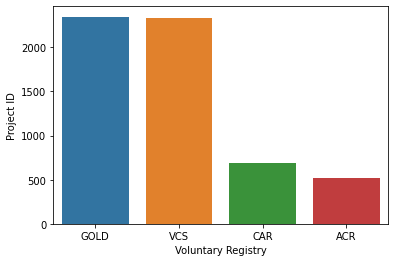

In [ ]:
sns.barplot(data = Voluntary_registers, x= Voluntary_registers['Voluntary Registry'], y = Voluntary_registers['Project ID']);

In [ ]:
# Print dataframe's head
# projects_df.head()
with pd.option_context('display.max_columns', None):  #This code allows to print all columns only in this section
  display(projects_df.head(3))

Project ID                         Project Name Voluntary Registry  \
0     ACR101                       AFOVERT Energy                ACR   
1     ACR102             Air Bag Gas Substitution                ACR   
2     ACR103  Inland Empire Anaerobic Ag Digester                ACR   

  ARB \nProject Voluntary Status                  Scope  \
0            No         Canceled  Household & Community   
1            No        Completed     Chemical Processes   
2            No        Completed            Agriculture   

                      Type Reduction / Removal Methodology / Protocol  \
0               Cookstoves           Reduction                    NaN   
1          SF6 Replacement           Reduction                    NaN   
2  Manure Methane Digester           Reduction                    NaN   

               Region        Country           State Project Site Location  \
0  Sub Saharan Africa           Mali  Niono District                 Niono   
1       North America  United States          OREGON             Beaverton   
2       North America  United States      CALIFORNIA                 Chino   

                Project Developer  Total Credits \nIssued  \
0                    Katene Kadji                       0   
1                            Nike                 7984006   
2  Inland Empire Utilities Agency                   44202   

   Total Credits \nRetired  Total Credits Remaining  First Year of Project  \
0                        0                        0                    NaN   
1                    17666                  7966340                 2003.0   
2                    28636                    15566                 2003.0   

   1996  1997  1998  1999  2000  2001  2002     2003     2004     2005  2006  \
0     0     0     0     0     0     0     0        0        0        0     0   
1     0     0     0     0     0     0     0  1898382  3004613  3081011     0   
2     0     0     0     0     0     0     0     8072     5848     4409  3632   

   2007   2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
0     0      0     0     0     0     0     0     0     0     0     0     0   
1     0      0     0     0     0     0     0     0     0     0     0     0   
2  7998  13210  1033     0     0     0     0     0     0     0     0     0   

   2019  2020  2021  1996.1  1997.1  1998.1  1999.1  2000.1  2001.1  2002.1  \
0     0     0     0       0       0       0       0       0       0       0   
1     0     0     0       0       0       0       0       0       0       0   
2     0     0     0       0       0       0       0       0       0       0   

   2003.1  2004.1  2005.1  2006.1  2007.1  2008.1  2009.1  2010.1  2011.1  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0    5000   
2       0       0      66       0     134       0       0   13850   10490   

   2012.1  2013.1  2014.1  2015.1  2016.1  2017.1  2018.1  2019.1  2020.1  \
0       0       0       0       0       0       0       0       0       0   
1    1966     400   10025     275       0       0       0       0       0   
2     147    3917       0       0       0      32       0       0       0   

   2021.1  Year \nUnknown  1996.2  1997.2  1998.2  1999.2  2000.2  2001.2  \
0       0               0       0       0       0       0       0       0   
1       0               0       0       0       0       0       0       0   
2       0               0       0       0       0       0       0       0   

   2002.2   2003.2   2004.2   2005.2  2006.2  2007.2  2008.2  2009.2  2010.2  \
0       0        0        0        0       0       0       0       0       0   
1       0  1890716  3004613  3071011       0       0       0       0       0   
2       0     5572     5816     4178       0       0       0       0       0   

   2011.2  2012.2  2013.2  2014.2  2015.2  2016.2  2017.2  2018.2  2019.2  \
0       0       0       0       0   

Note: There are four year-groups in this datasource.
  1. Credits issued by vintage year (when reduction/removals occurred)
  2. Credits retired in:
  3. Credits remaining by vintage:
  4. Credits issued by issuance year (when the registry issued the credits)

As far as I can see, the first and fourth groups are the same data, but in different years. That's explained by Berkeley's people:\
  "It can take two years or more between the end of a reporting period and the issuance of credits by the registries."\
Anyway, it's the same data. We must look for a reason to choose one and remove the other. Maybe keep the first one? I mean: it's the data of the year when the reduction happens.

The second group says that are the cancelled or retired credits. Thus, I think that it's discardable data.

The third group is a 'kind' of substraction between first and second group, but I really don't understand.

I suggest to group the Berkeley's data per country and year, because the World Bank data has the same granularity (it'd be comparable between them and it'd make easier the processing task). Although, it's necessary to check which other columns must be kept and which other should be discarded. I think we could keep the following columns: \

 'Scope', \
 ' Type',\
 'Reduction / Removal',\
 'Region',\
 'Country', and \
 The first years-group.

In [ ]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5890 entries, 0 to 5889
Columns: 141 entries, Project ID to Date added to database
dtypes: datetime64[ns](1), float64(3), int64(108), object(29)
memory usage: 6.3+ MB


In [ ]:
# projects_df.columns.tolist()
projects_df.columns

Index([                                'Project ID',
                                     'Project Name',
                               'Voluntary Registry',
                                    'ARB \nProject',
                                 'Voluntary Status',
                                            'Scope',
                                            ' Type',
                              'Reduction / Removal',
                           'Methodology / Protocol',
                                           'Region',
       ...
                                           '2015.3',
                                           '2016.3',
                                           '2017.3',
                                           '2018.3',
                                           '2019.3',
                                           '2020.3',
                                           '2021.3',
                              'Notes from Registry',
       'Notes from Berkeley Carbon 

In [ ]:
# Data analysis from acr_projects_df per project type (count)
projects_df.groupby(['Project Type'])['Total Credits \nIssued'].count().sort_values(ascending = False).reset_index()
#Total Credits \nIssued	Total Credits \nRetired	Total Credits Remaining


Project Type  Total Credits \nIssued
0   Energy industries (renewable/non-renewable sou...                    1443
1                          ENERGY_EFFICIENCY_DOMESTIC                    1125
2             Agriculture Forestry and Other Land Use                     389
3                                                WIND                     345
4                                         BIOGAS_HEAT                     198
..                                                ...                     ...
84  Energy industries (renewable/non-renewable sou...                       1
85              Mine Methane Capture - ARB Compliance                       1
86        Metal production; Mining/mineral production                       1
87                        Industrial Gas Substitution                       1
88                                        Adipic Acid                       1

[89 rows x 2 columns]

In [ ]:
projects_df.groupby(['Project Type'])['Total Credits \nIssued','Total Credits \nRetired','Total Credits Remaining'].sum().sort_values(by = 'Total Credits Remaining' ,ascending = False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Project Type  Total Credits \nIssued  \
0             Agriculture Forestry and Other Land Use               411587214   
1   Energy industries (renewable/non-renewable sou...               391797213   
2                                       Forest Carbon               137530515   
3                                                WIND                64689467   
4         Improved Forest Management - ARB Compliance                66902635   
..                                                ...                     ...   
84  Energy industries (renewable/non-renewable sou...                       0   
85  Energy industries (renewable/non-renewable sou...                       0   
86                                      Reforestation                       0   
87                            Coal Mine Methane - VAM                  278177   
88                       Coal Mine Methane - Drainage                  931263   

    Total Credits \nRetired  Total Credits Remaining  
0                 177628068                233959146  
1                 207603487                184193726  
2                  87975347                 49555168  
3                  32787228                 31902239  
4                  38525047                 28377588  
..                      ...                      ...  
84                        0                        0  
85                        0                        0  
86                        0                        0  
87                   287462                    -9285  
88                   943245                   -11982  

[89 rows x 4 columns]

In [ ]:
acr_projects_df = data_by_sheet_name['ACR Projects']
acr_projects_df.head()

Project ID                                       Project Name ARB ID  \
0     ACR101                                     AFOVERT Energy    NaN   
1     ACR102                           Air Bag Gas Substitution    NaN   
2     ACR103                Inland Empire Anaerobic Ag Digester    NaN   
3     ACR104  Ankotrofotsy Community-based Reforestation and...    NaN   
4     ACR105                                      Boa Vista A/R    NaN   

                Project Developer  \
0                    Katene Kadji   
1                            Nike   
2  Inland Empire Utilities Agency   
3            Tany Meva Foundation   
4                F.I.T Timber Ltd   

                                            Verifier  \
0                                                NaN   
1                                                ERT   
2                            Ruby Canyon Environment   
3                                                NaN   
4  SCS Global Services (Scientific Certification ...   

                  Project Type Voluntary Status        ARB Status  \
0               Fuel Switching         Canceled  Not ARB Eligible   
1  Industrial Gas Substitution        Completed  Not ARB Eligible   
2   Livestock Waste Management        Completed  Not ARB Eligible   
3                Forest Carbon         Inactive  Not ARB Eligible   
4                Forest Carbon        Completed  Not ARB Eligible   

  Project Site Location Project Site State Project Site Country  \
0                 Niono     Niono District                   ML   
1             Beaverton             OREGON                   US   
2                 Chino         CALIFORNIA                   US   
3          Ankotrofotsy        Miandrivazo                   MG   
4             Boa Vista            Roraima                   BR   

                      Additional Certifications/SDGs Project Notes  \
0  Clean Water & Sanitation; Affordable & Clean E...           NaN   
1                                                NaN           NaN   
2                                                NaN           NaN   
3  Clean Water & Sanitation; Climate Action; Life...           NaN   
4  Clean Water & Sanitation; Climate Action; Life...           NaN   

   Total Number of Credits Registered  Project Website  
0                                  NaN             NaN  
1                            7984006.0             NaN  
2                              44202.0             NaN  
3                                  NaN             NaN  
4                            3674586.0             NaN

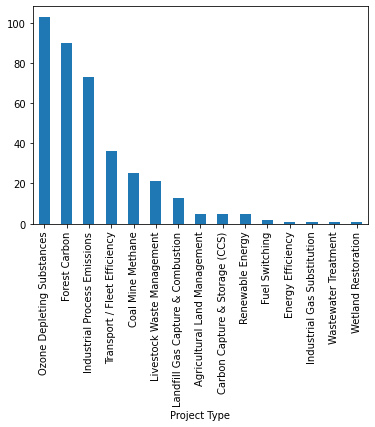

In [ ]:
# Plotting the previous analysis
acr_projects_df.groupby(['Project Type'])['Total Number of Credits Registered '].count().sort_values(ascending = False).plot(kind = 'bar')

In [ ]:
# Data analysis from acr_projects_df per project type (sum)
acr_projects_df.groupby(['Project Type'])['Total Number of Credits Registered '].sum().sort_values(ascending = False)

Project Type
Forest Carbon                        138182529.0
Carbon Capture & Storage (CCS)        21780080.0
Industrial Process Emissions          11362699.0
Ozone Depleting Substances            10311496.0
Industrial Gas Substitution            7984006.0
Landfill Gas Capture & Combustion      6228851.0
Coal Mine Methane                      4412170.0
Livestock Waste Management             1728861.0
Renewable Energy                       1609305.0
Transport / Fleet Efficiency            934709.0
Energy Efficiency                       439035.0
Fuel Switching                          255129.0
Agricultural Land Management            166866.0
Wastewater Treatment                    100000.0
Wetland Restoration                      59552.0
Name: Total Number of Credits Registered , dtype: float64

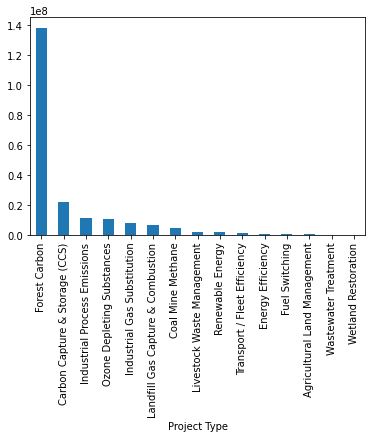

In [ ]:
# Plotting the previous analysis
acr_projects_df.groupby(['Project Type'])['Total Number of Credits Registered '].sum().sort_values(ascending = False).plot(kind='bar')

In [ ]:
# Data analysis from acr_projects_df per project developer and type (count)
acr_projects_df.groupby(['Project Developer','Project Type'])['Total Number of Credits Registered '].count().sort_values(ascending = False).head(15)

Project Developer             Project Type                
Tradewater, LLC               Ozone Depleting Substances      44
IdleAir                       Transport / Fleet Efficiency    33
Blue Source                   Forest Carbon                   27
EOS Climate Inc               Ozone Depleting Substances      22
Foam Supplies, Inc. 2         Industrial Process Emissions    22
True Manufacturing Co., Inc.  Industrial Process Emissions    16
A-Gas US Inc.                 Ozone Depleting Substances      12
Hudson Technologies Company   Ozone Depleting Substances      11
Camco Offsets I, LLC          Livestock Waste Management      10
Wabashco, LLC                 Ozone Depleting Substances       9
Keyrock Environment LLC       Coal Mine Methane                9
318                           Industrial Process Emissions     8
3Degrees Group, Inc.          Livestock Waste Management       7
The Nature Conservancy        Forest Carbon                    7
A-Gas US Inc.                 I

# EDA dataset 2: CO2 emissions (kt)

Data for up to 1990 are sourced from Carbon Dioxide Information Analysis Center, Environmental Sciences Division, Oak Ridge National Laboratory, Tennessee, United States: https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

To import the world bank dataset we use the following API/Package: https://pypi.org/project/wbgapi/



In [ ]:
# Loading of second data source: World Bank
# We can access the CO2 emissions series with the indicator "EN.ATM.CO2E.PC"
wbco = wb.data.DataFrame(['EN.ATM.CO2E.KT'])
wbco.head()

YR1960  YR1961  YR1962  YR1963  YR1964  YR1965  YR1966  YR1967  \
economy                                                                   
ABW         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
AFE         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
AFG         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
AFW         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
AGO         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         YR1968  YR1969  ...    YR2012    YR2013    YR2014    YR2015  \
economy                  ...                                           
ABW         NaN     NaN  ...       NaN       NaN       NaN       NaN   
AFE         NaN     NaN  ...  552280.0  573190.0  594270.0  578990.0   
AFG         NaN     NaN  ...   10450.0    8510.0    7810.0    7990.0   
AFW         NaN     NaN  ...  181740.0  191990.0  198440.0  193060.0   
AGO         NaN     NaN  ...   30250.0   32820.0   34630.0   35160.0   

           YR2016    YR2017    YR2018  YR2019  YR2020  YR2021  
economy                                                        
ABW           NaN       NaN       NaN     NaN     NaN     NaN  
AFE      584830.0  593740.0  592780.0     NaN     NaN     NaN  
AFG        7390.0    7380.0    7440.0     NaN     NaN     NaN  
AFW      195120.0  201900.0  224380.0     NaN     NaN     NaN  
AGO       35410.0   30840.0   27340.0     NaN     NaN     NaN  

[5 rows x 62 columns]

# Clean the Data

Before we start analyzing the data we need to clean it first. We will transform the data and eliminate or impute the missing values.

In [ ]:
# Remove the preffix "YR" from the column names in World Bank datasource
wb_columns=wbco.columns
new_wb_columns = [y.replace('YR', '') for y in wb_columns]
wbco.columns = new_wb_columns
wbco.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
# All the series have as key the country code used by the world bank
wbco.index

Index(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG',
       ...
       'VIR', 'VNM', 'VUT', 'WLD', 'WSM', 'XKX', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='economy', length=266)

In [ ]:
# List of country codes in World Bank Datasource
# the sub-package economy is used to obtain the information for every country (including its country name and code)
country_attributes = wb.economy.DataFrame(wbco.index.values.tolist())
country_attributes

name aggregate  longitude  latitude region  \
id                                                                       
AFG                  Afghanistan     False   69.17610   34.5228    SAS   
AFE  Africa Eastern and Southern      True        NaN       NaN          
AFW   Africa Western and Central      True        NaN       NaN          
ALB                      Albania     False   19.81720   41.3317    ECS   
DZA                      Algeria     False    3.05097   36.7397    MEA   
..                           ...       ...        ...       ...    ...   
PSE           West Bank and Gaza     False        NaN       NaN    MEA   
WLD                        World      True        NaN       NaN          
YEM                  Yemen, Rep.     False   44.20750   15.3520    MEA   
ZMB                       Zambia     False   28.29370  -15.3982    SSF   
ZWE                     Zimbabwe     False   31.06720  -17.8312    SSF   

    adminregion lendingType incomeLevel capitalCity  
id                                                   
AFG         SAS         IDX         LIC       Kabul  
AFE                                                  
AFW                                                  
ALB         ECA         IBD         UMC      Tirane  
DZA         MNA         IBD         LMC     Algiers  
..          ...         ...         ...         ...  
PSE         MNA         LNX         LMC              
WLD                                                  
YEM         MNA         IDX         LIC      Sana'a  
ZMB         SSA         IDX         LMC      Lusaka  
ZWE         SSA         IDB         LMC      Harare  

[266 rows x 9 columns]

From the country_attibutes dataset, we know some codes belong to an aggregate region (North America, Africa Eastern and Southern, etc).

In [ ]:
# Create a country - code DataFrame
country_name = country_attributes[country_attributes['aggregate'] == False]['name']
country_name

id
AFG              Afghanistan
ALB                  Albania
DZA                  Algeria
ASM           American Samoa
AND                  Andorra
               ...          
VIR    Virgin Islands (U.S.)
PSE       West Bank and Gaza
YEM              Yemen, Rep.
ZMB                   Zambia
ZWE                 Zimbabwe
Name: name, Length: 217, dtype: object

In [ ]:
wbco_df = wbco.join(country_name, how='right')       #Adding country names to world bank datasource
wbco_df.set_index('name', inplace=True) #Replacing old index (country codes) with new index (country names)
wbco_df.head()

1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
name                                                                         
Afghanistan      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Algeria          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
American Samoa   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Andorra          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                ...      2012      2013      2014      2015      2016  \
name            ...                                                     
Afghanistan     ...   10450.0    8510.0    7810.0    7990.0    7390.0   
Albania         ...    4580.0    4790.0    5220.0    5070.0    4930.0   
Algeria         ...  126640.0  129910.0  138810.0  145970.0  143350.0   
American Samoa  ...       NaN       NaN       NaN       NaN       NaN   
Andorra         ...     490.0     480.0     460.0     470.0     470.0   

                    2017      2018  2019  2020  2021  
name                                                  
Afghanistan       7380.0    7440.0   NaN   NaN   NaN  
Albania           5600.0    5560.0   NaN   NaN   NaN  
Algeria         145100.0  151670.0   NaN   NaN   NaN  
American Samoa       NaN       NaN   NaN   NaN   NaN  
Andorra            470.0     460.0   NaN   NaN   NaN  

[5 rows x 62 columns]

After we make some fundamental transformations to our dataset, it would be interesting to know how many missing values there are. (Analyze it per rows and columns and decide to eliminate or replace them)

In [ ]:
# How many countries (rows) and years (columns) are in the dataset
wbco_df.shape

(217, 62)

In [ ]:
# Removing empty rows (countries). We could drop them because these countries did not report the information for any year.
wbco_df.dropna(how='all', inplace=True)
# Removing empty columns (years). We could drop them because the data is only available between 1990 and 2018.
wbco_df.dropna(axis=1, how='all', inplace=True)
wbco_df.shape

(191, 29)

In [ ]:
# Verifying how many missing values were left
wbco_df.isnull().sum().sum()

1

In [ ]:
# Identify the missing values (country and year)
for i in range(0, len(wbco_df.index)):
  for j in wbco_df.columns:
    if math.isnan(wbco_df.loc[wbco_df.index[i]][j]):
      print('missing value: ', wbco_df.index[i], j)

missing value:  Namibia 1990


In [ ]:
# Replace missing values with the previous value
wbco_df.fillna(method='bfill', axis=1, inplace=True)
wbco_df.isnull().sum().sum()

0

In [ ]:
# Identify countries with no CO2 emissions
for i in range(0, len(wbco_df.index)):
  for j in wbco_df.columns:
    if wbco_df.loc[wbco_df.index[i]][j] == 0:
      print('No emissions: ', wbco_df.index[i], j)

No emissions:  Eritrea 1990
No emissions:  Eritrea 1991
No emissions:  Marshall Islands 1990
No emissions:  Marshall Islands 1991
No emissions:  Micronesia, Fed. Sts. 1990
No emissions:  Micronesia, Fed. Sts. 1991
No emissions:  Montenegro 1990
No emissions:  Montenegro 1991
No emissions:  Montenegro 1992
No emissions:  Montenegro 1993
No emissions:  Montenegro 1994
No emissions:  Montenegro 1995
No emissions:  Montenegro 1996
No emissions:  Montenegro 1997
No emissions:  Montenegro 1998
No emissions:  Montenegro 1999
No emissions:  Montenegro 2000
No emissions:  Montenegro 2001
No emissions:  Montenegro 2002
No emissions:  Montenegro 2003
No emissions:  Montenegro 2004
No emissions:  Palau 1990
No emissions:  Palau 1991
No emissions:  South Sudan 1990
No emissions:  South Sudan 1991
No emissions:  South Sudan 1992
No emissions:  South Sudan 1993
No emissions:  South Sudan 1994
No emissions:  South Sudan 1995
No emissions:  South Sudan 1996
No emissions:  South Sudan 1997
No emissions:

In [ ]:
# wbco_df.head()

with pd.option_context('display.max_columns', None):  #This line allows to print all columns only in this section
  display(wbco_df.head())

1990     1991     1992     1993     1994     1995     1996  \
name                                                                         
Afghanistan   2960.0   2740.0   1430.0   1360.0   1300.0   1250.0   1180.0   
Albania       6050.0   4110.0   2240.0   2070.0   2140.0   1950.0   1970.0   
Algeria      67890.0  66940.0  66160.0  73470.0  71550.0  73050.0  71410.0   
Andorra        410.0    410.0    410.0    410.0    410.0    430.0    450.0   
Angola        6330.0   6530.0   6370.0   6900.0   6690.0  10780.0  11410.0   

                1997     1998     1999     2000     2001     2002     2003  \
name                                                                         
Afghanistan   1100.0   1050.0    820.0    770.0    810.0   1100.0   1350.0   
Albania       1480.0   1800.0   2970.0   3170.0   3220.0   3750.0   4110.0   
Algeria      72830.0  74540.0  77540.0  78590.0  74770.0  80410.0  83840.0   
Andorra        470.0    490.0    510.0    520.0    520.0    530.0    530.0   
Angola       11730.0  11370.0  12650.0  12370.0  12910.0  13620.0  18010.0   

                2004     2005     2006      2007      2008      2009  \
name                                                                   
Afghanistan   1130.0   1640.0   1940.0    2360.0    4390.0    6000.0   
Albania       4290.0   4070.0   4050.0    4220.0    4170.0    4320.0   
Algeria      84890.0  88990.0  93750.0  100520.0  103990.0  112770.0   
Andorra        560.0    580.0    550.0     540.0     540.0     520.0   
Angola       19290.0  18210.0  20340.0   23490.0   25080.0   27150.0   

                 2010      2011      2012      2013      2014      2015  \
name                                                                      
Afghanistan    8670.0   12260.0   10450.0    8510.0    7810.0    7990.0   
Albania        4580.0    5040.0    4580.0    4790.0    5220.0    5070.0   
Algeria      113140.0  118140.0  126640.0  129910.0  138810.0  145970.0   
Andorra         520.0     490.0     490.0     480.0     460.0     470.0   
Angola        28530.0   29460.0   30250.0   32820.0   34630.0   35160.0   

                 2016      2017      2018  
name                                       
Afghanistan    7390.0    7380.0    7440.0  
Albania        4930.0    5600.0    5560.0  
Algeria      143350.0  145100.0  151670.0  
Andorra         470.0     470.0     460.0  
Angola        35410.0   30840.0   27340.0

In [ ]:
# Transform data from wide format to long format
columns = wbco_df.columns
# columns
wbco_df_long = wbco_df.reset_index()
wbco_df_long = pd.melt(wbco_df_long, id_vars=['name'], value_vars=columns, var_name ='Year', value_name ='CO2_emitted')
wbco_df_long['Year'] = pd.to_datetime(wbco_df_long['Year'], format='%Y').dt.year
wbco_df_long

name  Year  CO2_emitted
0       Afghanistan  1990       2960.0
1           Albania  1990       6050.0
2           Algeria  1990      67890.0
3           Andorra  1990        410.0
4            Angola  1990       6330.0
...             ...   ...          ...
5534  Venezuela, RB  2018     138160.0
5535        Vietnam  2018     257860.0
5536    Yemen, Rep.  2018       9310.0
5537         Zambia  2018       7740.0
5538       Zimbabwe  2018      12270.0

[5539 rows x 3 columns]

# Outliers

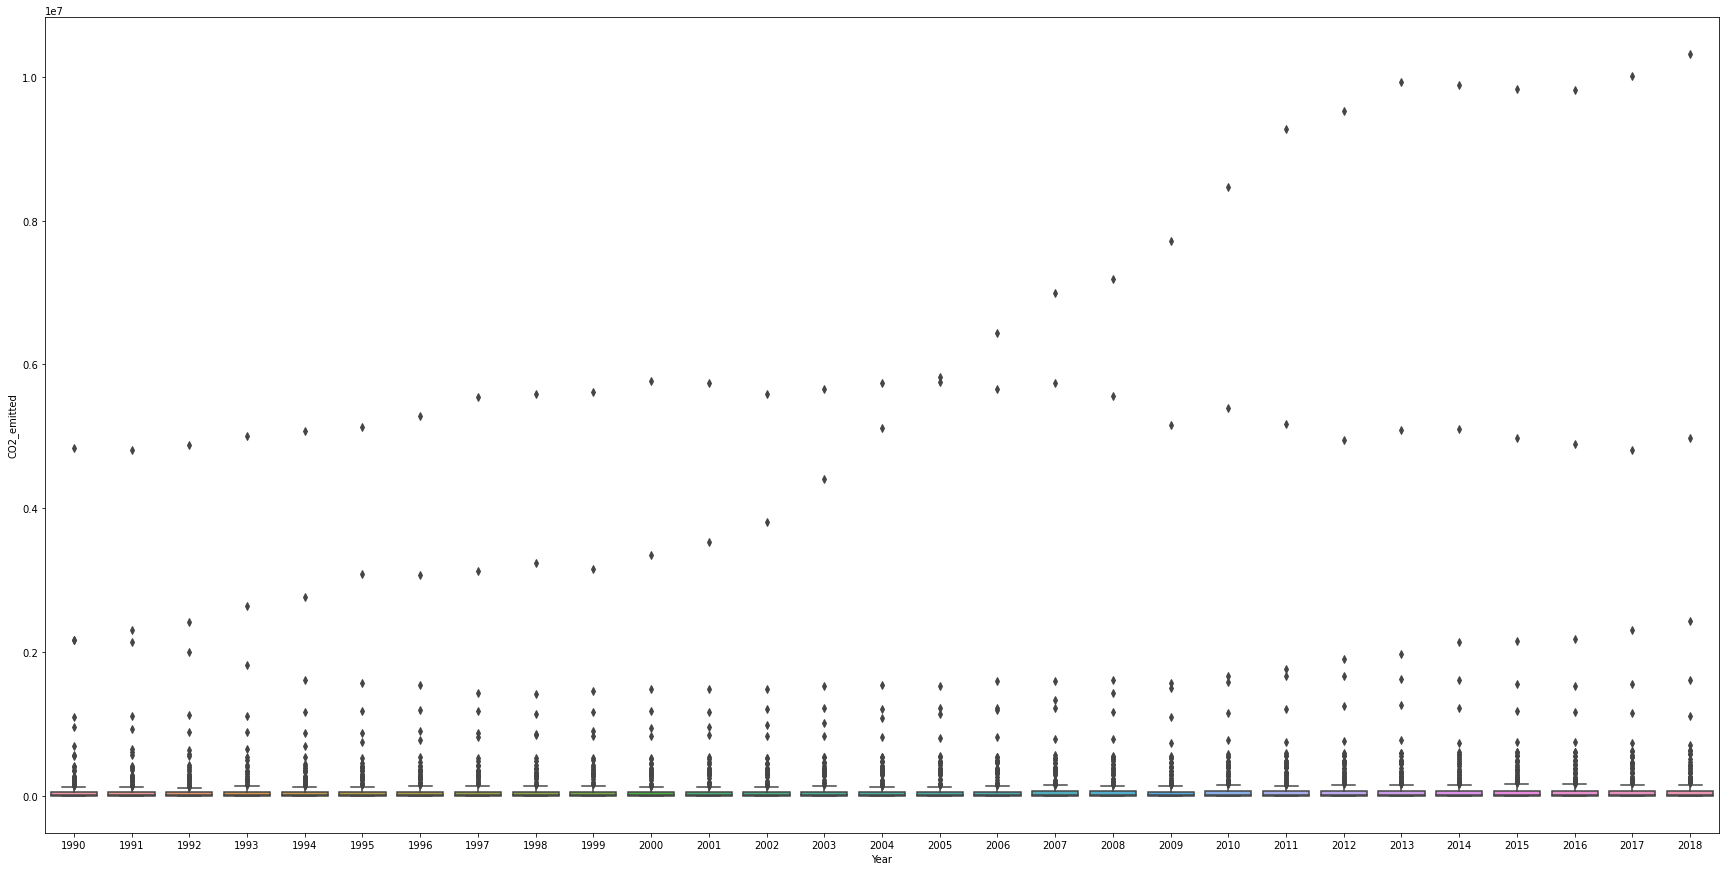

In [ ]:
# Boxplot by year

fig=plt.figure(figsize=(30, 15))
sns.boxplot(data=wbco_df_long, x='Year', y='CO2_emitted')

From the previous plot, we could identify that all the outliers are countries that have very high CO2 emissions.

[]

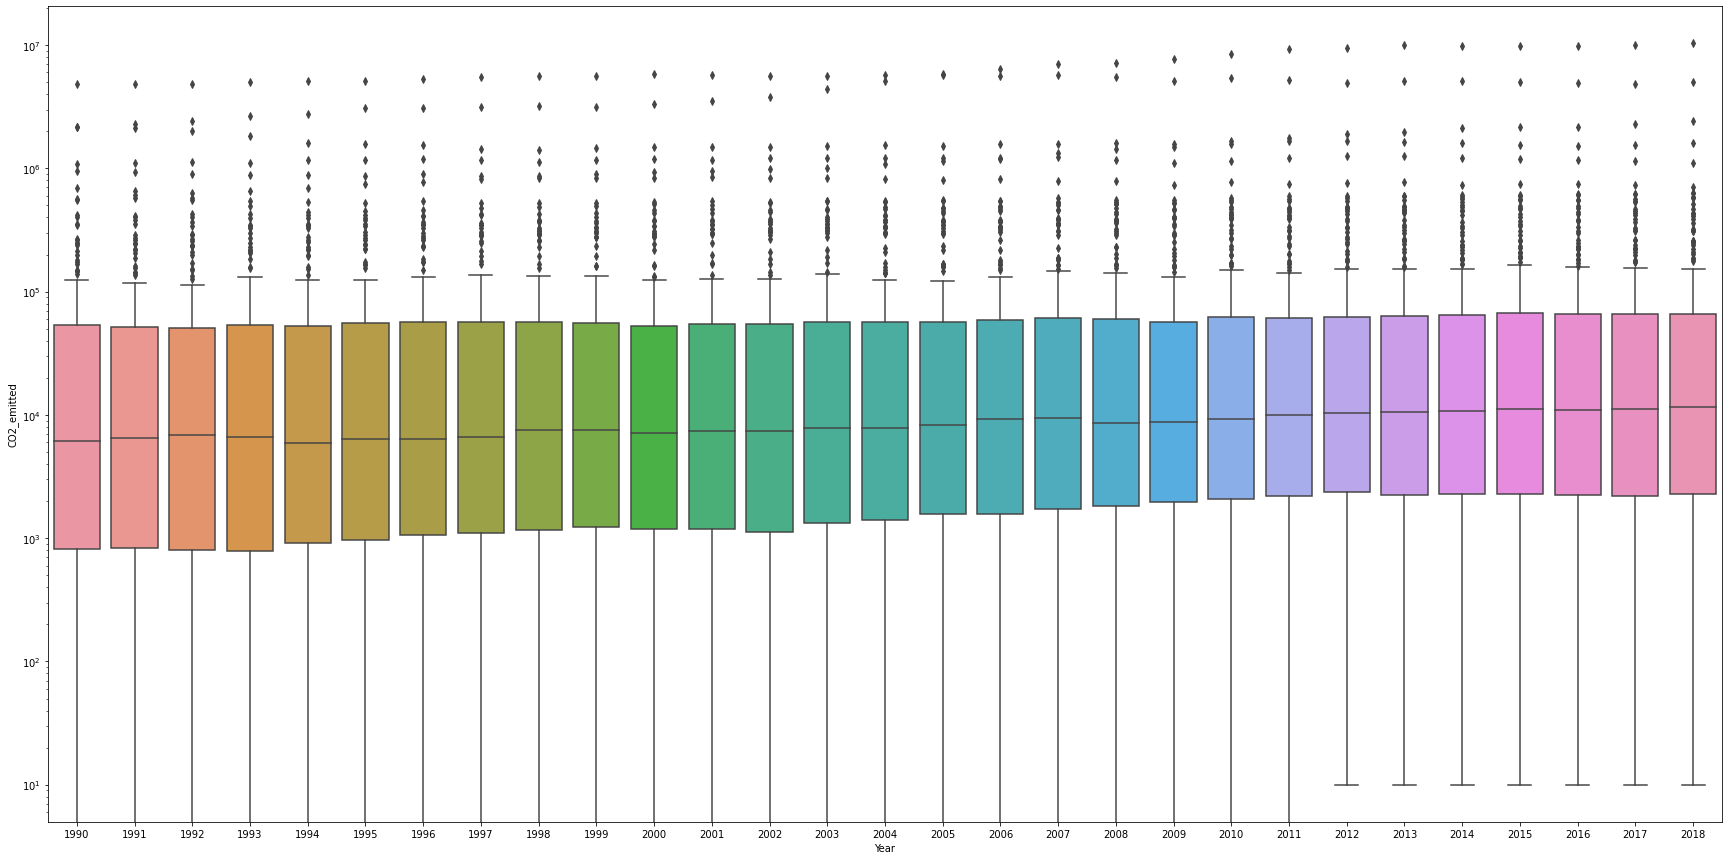

In [ ]:
# Boxplot by year Logaritmic Scale

fig=plt.figure(figsize=(30, 15))
sns.boxplot(data=wbco_df_long, x='Year', y='CO2_emitted')
plt.semilogy()

In [ ]:
# define a function to identify the outliers

def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data.CO2_emitted), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = []

    for row in data.iterrows():
      if row[1][2] <= lower_bound or row[1][2]  >= upper_bound:
        outliers.append([row[1][0], row[1][2]])
 
    return outliers

In [ ]:
# detect outliers by year

year_df = pd.DataFrame(columns=['Year'])
outliers_df = pd.DataFrame(columns = ['Country', 'CO2_emitted'])

for year in wbco_df_long.Year.unique():
  temp = pd.DataFrame(detect_outlier(wbco_df_long[wbco_df_long.Year == year]), columns = ['Country', 'CO2_emitted'])
  temp_2 = pd.DataFrame([year] * len(temp), columns = ['Year'])
  outliers_df = outliers_df.append(temp)
  year_df = year_df.append(temp_2)

outliers_df = pd.concat([year_df, outliers_df], axis=1)

outliers_df

Year               Country  CO2_emitted
0   1990             Australia     263600.0
1   1990                Brazil     198260.0
2   1990                Canada     419120.0
3   1990                 China    2173360.0
4   1990        Czech Republic     150200.0
..   ...                   ...          ...
26  2018               Ukraine     185370.0
27  2018  United Arab Emirates     200300.0
28  2018        United Kingdom     358800.0
29  2018         United States    4981300.0
30  2018               Vietnam     257860.0

[805 rows x 3 columns]

In [ ]:
# Ranking CO2_emissions by countryin the outliers dataset (Top 10)

outliers_df.groupby(['Country']).sum()['CO2_emitted'].sort_values(ascending=False).head(10)

Country
China                 169414160.0
United States         153534870.0
Russian Federation     46892050.0
India                  37396700.0
Japan                  34009280.0
Germany                23704400.0
Canada                 14850020.0
United Kingdom         14440390.0
Korea, Rep.            13766060.0
Iran, Islamic Rep.     12353110.0
Name: CO2_emitted, dtype: float64

In [ ]:
# Ranking CO2_emissions by country in all the dataset (Top 10)

wbco_df_long.groupby(['name']).sum()['CO2_emitted'].sort_values(ascending=False).head(10)

name
China                 169414160.0
United States         153534870.0
Russian Federation     46892050.0
India                  37396700.0
Japan                  34009280.0
Germany                23704400.0
Canada                 14850020.0
United Kingdom         14440390.0
Korea, Rep.            13766060.0
Iran, Islamic Rep.     12353110.0
Name: CO2_emitted, dtype: float64

# Correlation between countries

In [ ]:
# Create a correlation matix
pivot_df = wbco_df_long.pivot(index='Year', columns='name', values='CO2_emitted')
pivot_df.corr()

name           Afghanistan   Albania   Algeria   Andorra    Angola  \
name                                                                 
Afghanistan       1.000000  0.683757  0.848223 -0.042667  0.835663   
Albania           0.683757  1.000000  0.717340  0.192853  0.694786   
Algeria           0.848223  0.717340  1.000000  0.125316  0.947386   
Andorra          -0.042667  0.192853  0.125316  1.000000  0.328345   
Angola            0.835663  0.694786  0.947386  0.328345  1.000000   
...                    ...       ...       ...       ...       ...   
Venezuela, RB     0.721829  0.524162  0.766220  0.514941  0.905643   
Vietnam           0.799915  0.720346  0.983487  0.202913  0.927456   
Yemen, Rep.       0.446737  0.378398  0.415603  0.638146  0.633867   
Zambia            0.661751  0.607945  0.836303 -0.263678  0.638813   
Zimbabwe         -0.387359 -0.487537 -0.559600 -0.771802 -0.712101   

name           Antigua and Barbuda  Argentina   Armenia  Australia   Austria  \
name                                                                           
Afghanistan               0.498367   0.811826  0.037605   0.605591 -0.026470   
Albania                   0.377731   0.628552  0.327134   0.596636  0.235834   
Algeria                   0.525358   0.935308 -0.171893   0.773299  0.090296   
Andorra                   0.347408   0.353700 -0.482916   0.705140  0.896200   
Angola                    0.589172   0.972637 -0.259366   0.875200  0.292082   
...                            ...        ...       ...        ...       ...   
Venezuela, RB             0.577653   0.886813 -0.389767   0.874058  0.435169   
Vietnam                   0.513978   0.922010 -0.202014   0.807304  0.178991   
Yemen, Rep.               0.587017   0.601280 -0.305118   0.726254  0.557059   
Zambia                    0.225206   0.635502  0.098761   0.386858 -0.222402   
Zimbabwe                 -0.640785  -0.698790  0.438422  -0.895041 -0.734998   

name           ...  United Kingdom  United States   Uruguay  Uzbekistan  \
name           ...                                                        
Afghanistan    ...       -0.786883      -0.507901  0.721072    0.001874   
Albania        ...       -0.591465      -0.292804  0.383913    0.329008   
Algeria        ...       -0.944541      -0.362316  0.694119   -0.101099   
Andorra        ...        0.060803       0.804303  0.358257    0.516568   
Angola         ...       -0.831159      -0.172060  0.775237   -0.013333   
...            ...             ...            ...       ...         ...   
Venezuela, RB  ...       -0.596365       0.091504  0.800140    0.068984   
Vietnam        ...       -0.936352      -0.287797  0.657031   -0.040410   
Yemen, Rep.    ...       -0.183353       0.334821  0.636041    0.334024   
Zambia         ...       -0.898979      -0.625941  0.345791   -0.257560   
Zimbabwe       ...        0.388573      -0.372918 -0.588290   -0.300342   

name            Vanuatu  Venezuela, RB   Vietnam  Yemen, Rep.    Zambia  \
name                                                                      
Afghanistan    0.767158       0.721829  0.799915     0.446737  0.661751   
Albania        0.633901       0.524162  0.720346     0.378398  0.607945   
Algeria        0.917991       0.766220  0.983487     0.415603  0.836303   
Andorra        0.051504       0.514941  0.202913     0.638146 -0.263678   
Angola         0.847995       0.905643  0.927456     0.633867  0.638813   
...                 ...            ...       ...          ...       ...   
Venezuela, RB  0.632590       1.000000  0.729716     0.826765  0.340305   
Vietnam        0.923115       0.729716  1.000000     0.375973  0.834154   
Yemen, Rep.    0.272170       0.826765  0.375973     1.000000 -0.070747   
Zambia         0.814643       0.340305  0.834154    -0.070747  1.000000   
Zimbabwe      -0.480107      -0.738079 -0.610783    -0.718916 -0.154148   

name           Zimbabwe  
name                     
Afghanistan   -0.387359  
Albania       -0.4

In [ ]:
# Most correlated pairs in the correlation matrix (absolute correlation)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(pivot_df, 15))

Top Absolute Correlations
name                name                
Bangladesh          India                   0.996108
Algeria             India                   0.994697
India               Oman                    0.994394
Bangladesh          Vietnam                 0.994108
Iran, Islamic Rep.  Malaysia                0.993553
India               Qatar                   0.993526
Oman                Qatar                   0.993075
Algeria             Qatar                   0.992961
Bangladesh          Oman                    0.992881
Morocco             United Arab Emirates    0.992871
Bangladesh          Uganda                  0.992746
Algeria             Oman                    0.992513
Bahrain             Morocco                 0.992248
Qatar               United Arab Emirates    0.992233
Egypt, Arab Rep.    Morocco                 0.992053
dtype: float64


Text(0.5, 0.98, 'CO2 Correlations by country heatmap')

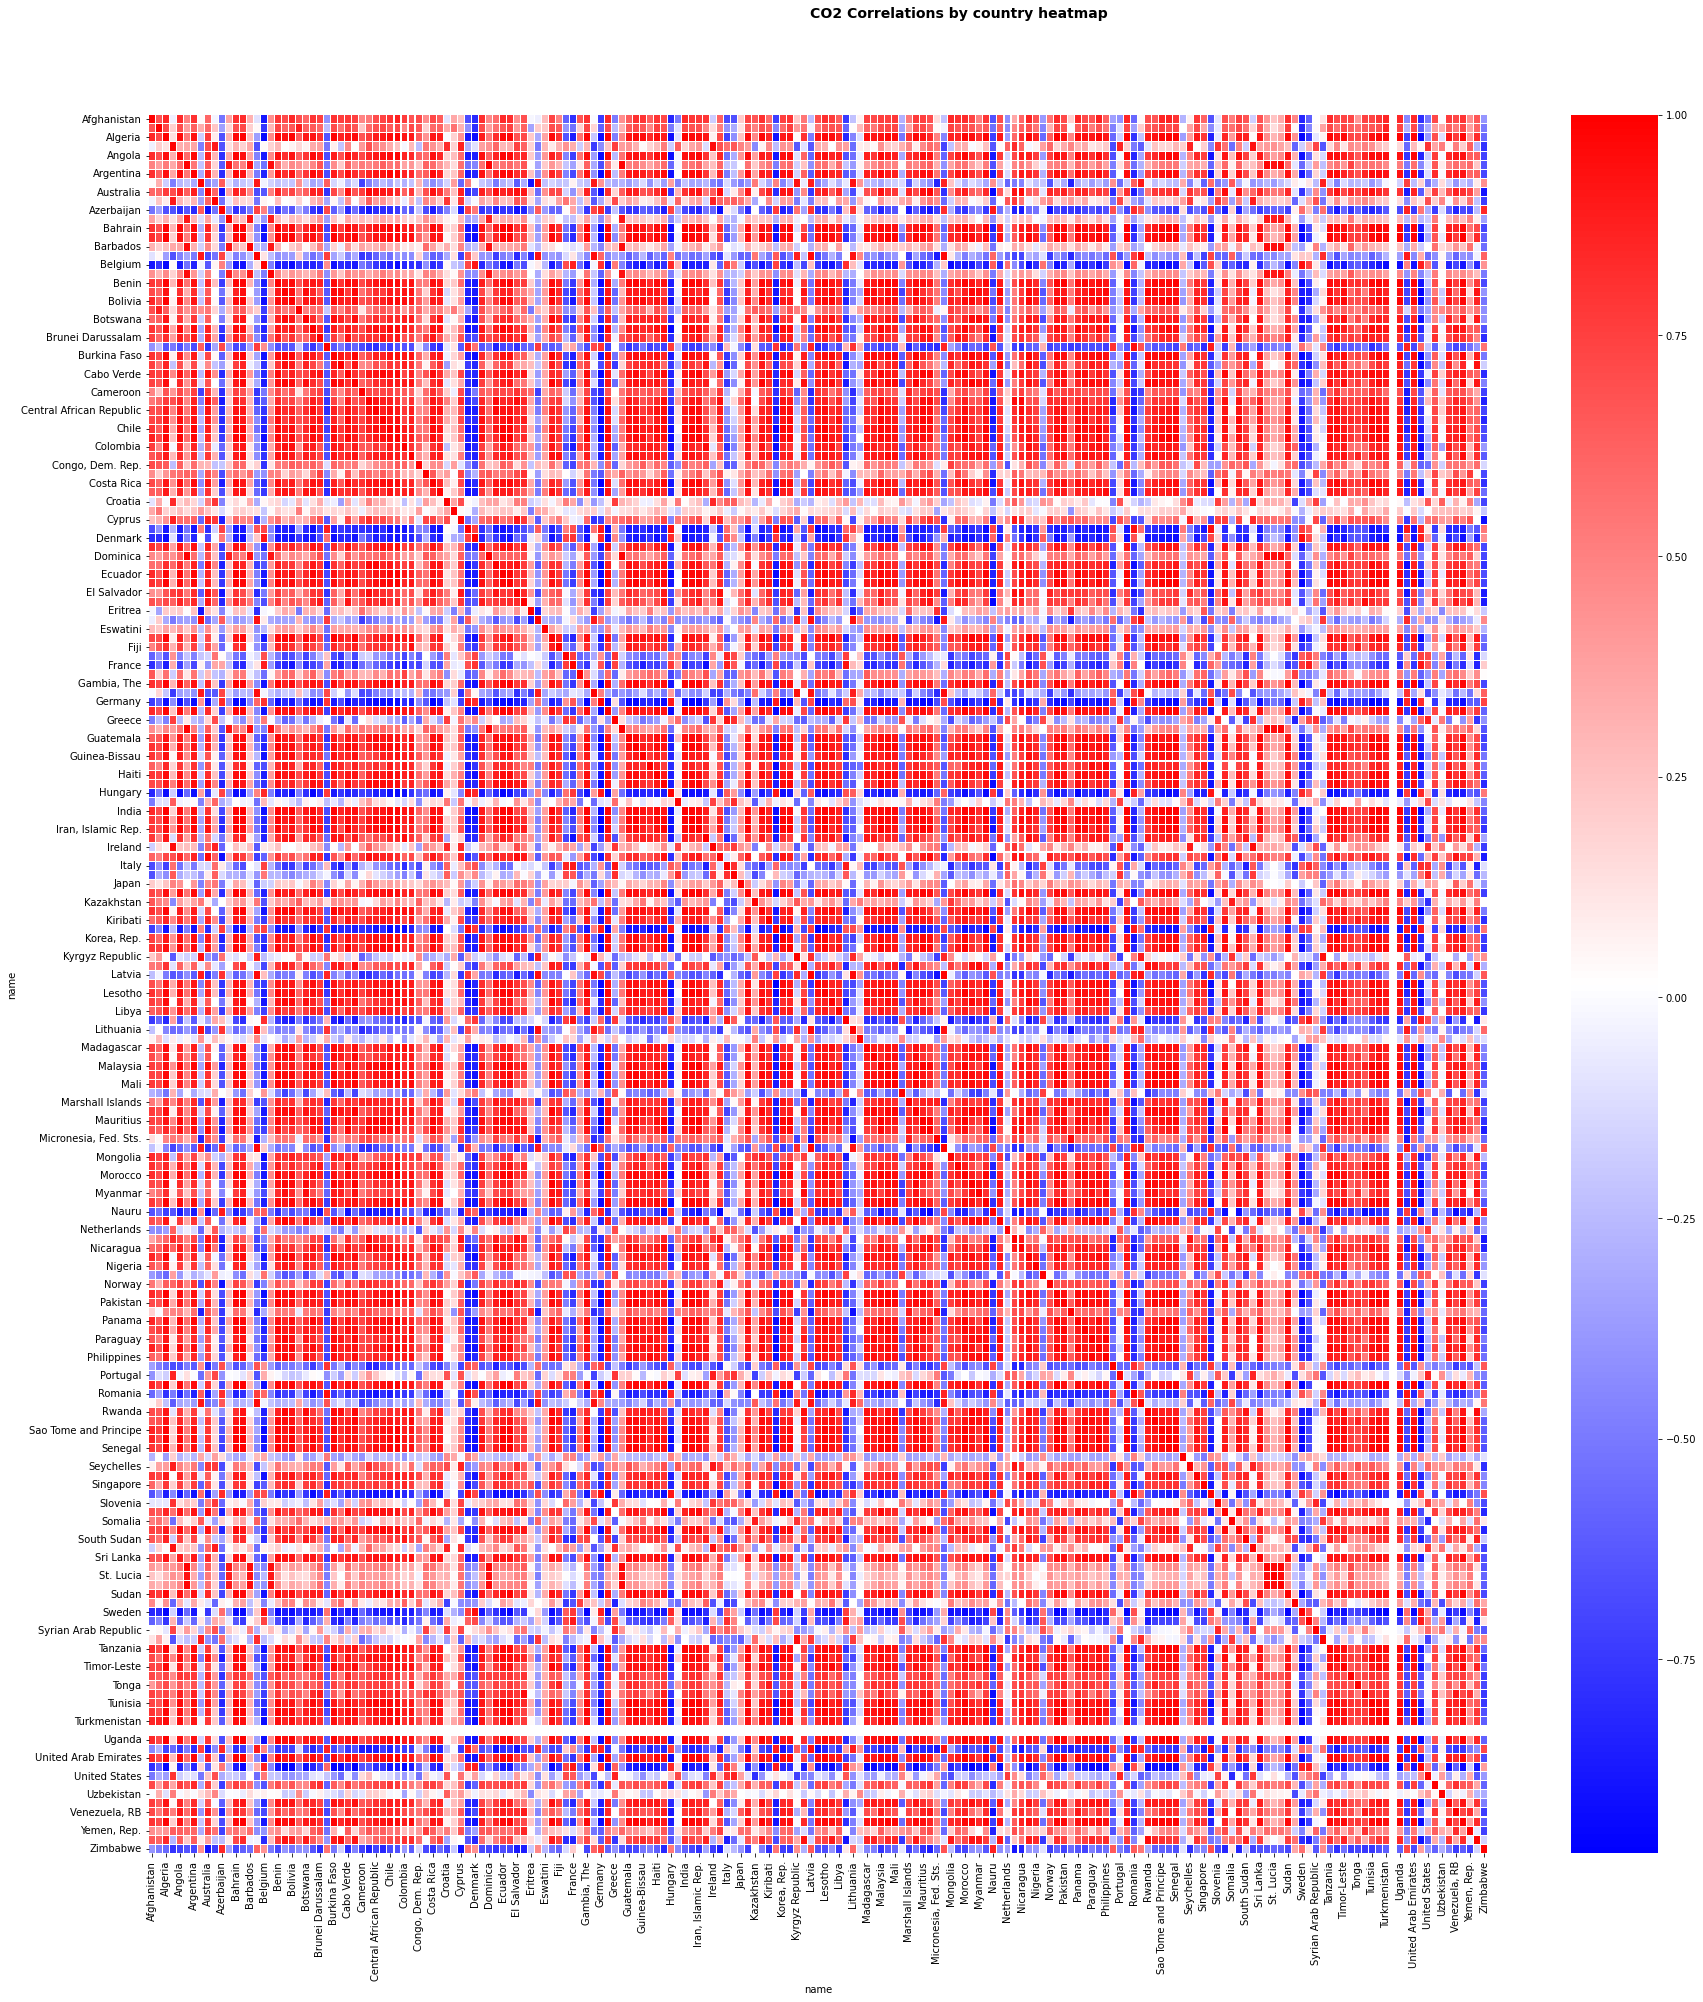

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(30, 30))

# Create a heatmap for correlations

hm = sns.heatmap(pivot_df.corr(),
                 ax=ax,
                 cmap='bwr',
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('CO2 Correlations by country heatmap', fontsize=14, fontweight='bold')

# visualize the data

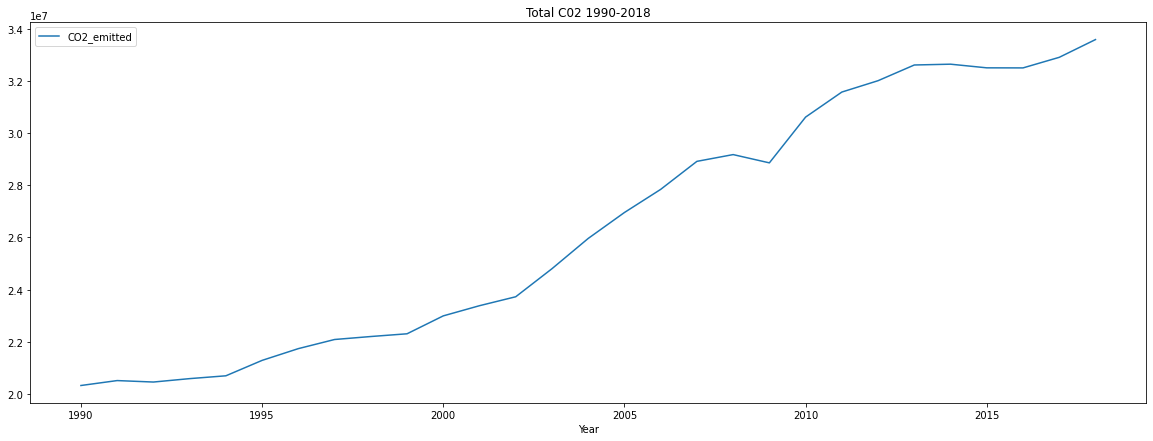

In [ ]:
# Total C02 emitted by year (per capita)

fig=plt.figure(figsize=(20, 7))
plt.title('Total C02 1990-2018')
wbco_df_long.groupby(['Year']).sum()['CO2_emitted'].plot(legend=True)

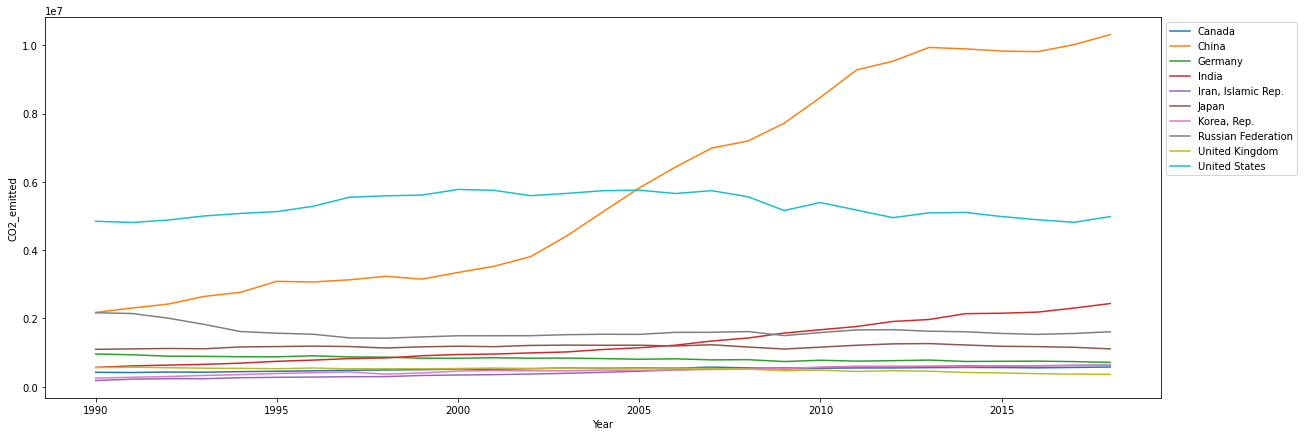

In [ ]:
# Top 10 countries by average emissions

top = wbco_df_long.groupby(['name']).mean()['CO2_emitted'].sort_values(ascending=False).head(10).index.tolist()

top_df = wbco_df_long[wbco_df_long['name'].isin(top)]

fig=plt.figure(figsize=(20, 7))
sns.lineplot(data=top_df, x='Year', y='CO2_emitted', hue='name')
plt.legend(bbox_to_anchor =(1, 1))

'Start testing code\n# densds2.xlabel("Year")\n# densds2.ylabel("Count")\n# densds2.title("Employee count at ABC")\n# densds2.figure(figsize=(8,6))\n# sns.kdeplot(data=wbco_df_long, x="Year", hue="name")\n\nEnd testing code'

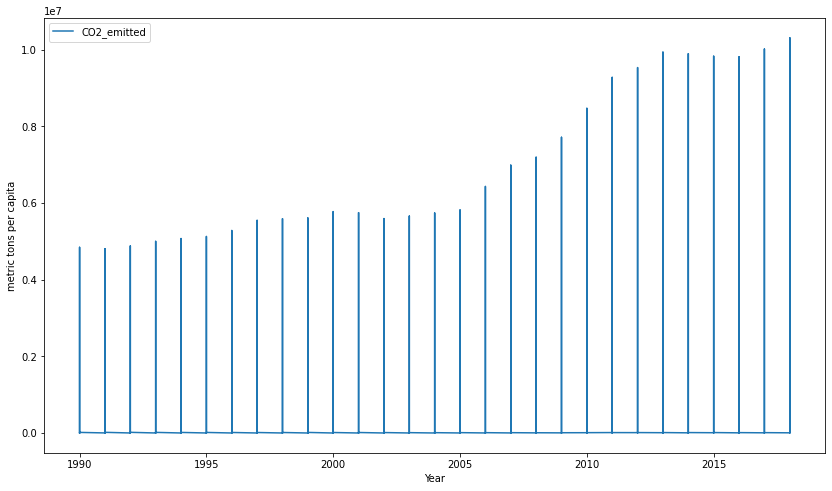

In [ ]:
# World Bank data plotting

"""Start testing code
# wbco_df_long.groupby(["Year"]).size()
# wbco_df_long["Year"] = wbco_df_long["Year"].astype(int)
# wbco_df_long.info()
# change the figure size
plt.figure(figsize=(8,6))

End testing code"""

# plot a line chart
densds2 = wbco_df_long.plot(kind="line",x="Year",ylabel="metric tons per capita", figsize=(14,8))


"""Start testing code
# densds2.xlabel("Year")
# densds2.ylabel("Count")
# densds2.title("Employee count at ABC")
# densds2.figure(figsize=(8,6))
# sns.kdeplot(data=wbco_df_long, x="Year", hue="name")

End testing code"""

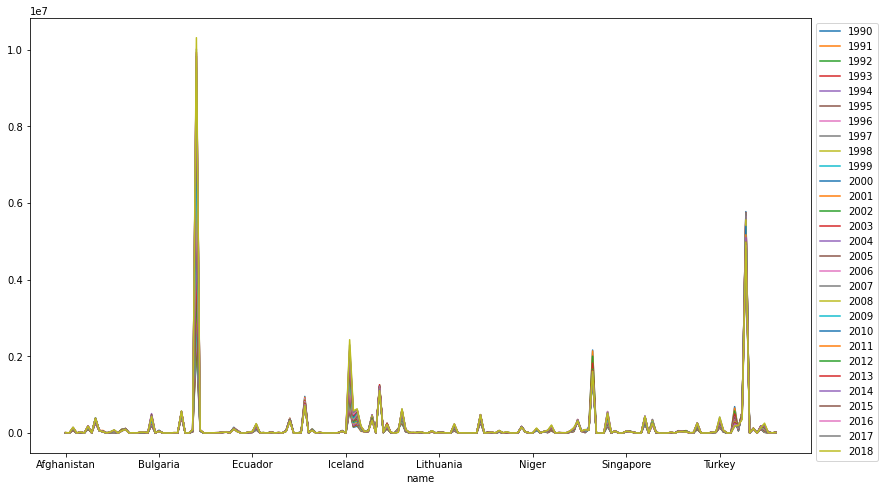

In [ ]:
wbco_df.plot(figsize=(14,8))
plt.legend(bbox_to_anchor =(1, 1))

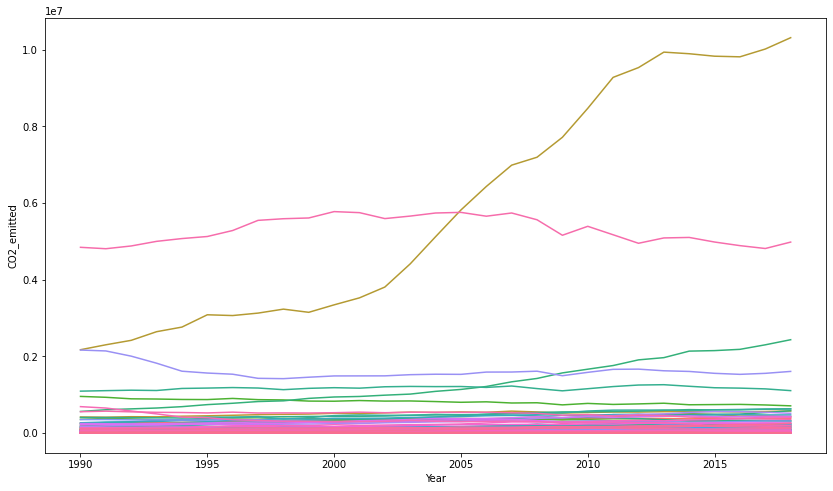

In [ ]:
# The objective of this plot is to show the data per year, categoryzed by country. But there are many countries to build this kind of plot

fig=plt.figure(figsize=(14, 8))
sns.lineplot(data=wbco_df_long, x='Year', y='CO2_emitted', hue='name', legend=None)


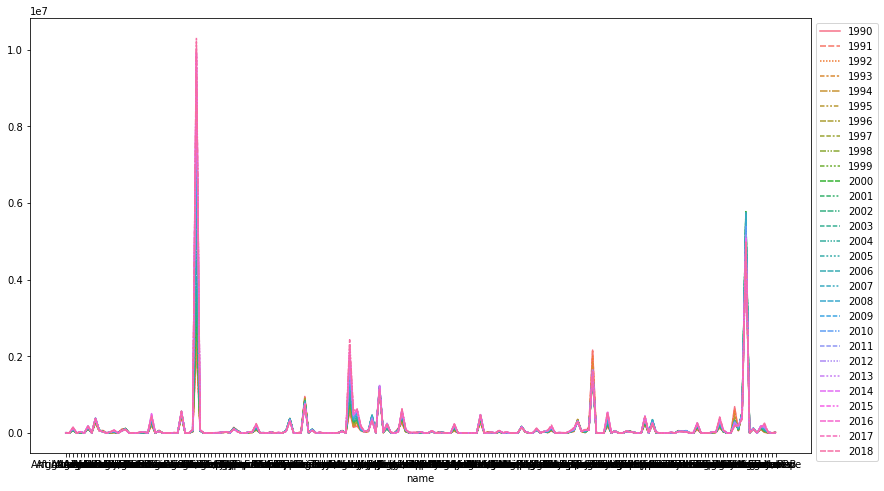

In [ ]:
fig=plt.figure(figsize=(14, 8))
sns.lineplot(data=wbco_df)
plt.legend(bbox_to_anchor =(1, 1))

# Heatmap (CO2 emitted)

In [ ]:
lat_lon = country_attributes.reset_index()[['name', 'latitude', 'longitude']]
lat_lon.head()

name  latitude  longitude
0                  Afghanistan   34.5228   69.17610
1  Africa Eastern and Southern       NaN        NaN
2   Africa Western and Central       NaN        NaN
3                      Albania   41.3317   19.81720
4                      Algeria   36.7397    3.05097

In [ ]:
new_df = wbco_df_long.merge(lat_lon, on='name')
new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y').dt.year
new_df.head()

name  Year  CO2_emitted  latitude  longitude
0  Afghanistan  1990       2960.0   34.5228    69.1761
1  Afghanistan  1991       2740.0   34.5228    69.1761
2  Afghanistan  1992       1430.0   34.5228    69.1761
3  Afghanistan  1993       1360.0   34.5228    69.1761
4  Afghanistan  1994       1300.0   34.5228    69.1761

In [ ]:
new_df.isnull().sum()

name           0
Year           0
CO2_emitted    0
latitude       0
longitude      0
dtype: int64

In [ ]:
new_df.dtypes

name            object
Year             int64
CO2_emitted    float64
latitude       float64
longitude      float64
dtype: object

In [ ]:
agg = new_df.groupby(by='Year', as_index=True).sum()

def find_norm(x, df_col_list): # x is a row in dataframe, col_list is the list of columns to normalize

    for column in df_col_list: # iterate over col list, find mean from aggregations, and divide the value by the total
        sum_col = agg.loc[x.Year, column]
        col_name = "norm" + str(column)
        x[col_name] = x[column] / sum_col # norm

    return x

new_df2 = new_df.apply(find_norm, df_col_list = ['CO2_emitted'], axis=1)

new_df2.head()

name  Year  CO2_emitted  latitude  longitude  normCO2_emitted
0  Afghanistan  1990       2960.0   34.5228    69.1761         0.000146
1  Afghanistan  1991       2740.0   34.5228    69.1761         0.000134
2  Afghanistan  1992       1430.0   34.5228    69.1761         0.000070
3  Afghanistan  1993       1360.0   34.5228    69.1761         0.000066
4  Afghanistan  1994       1300.0   34.5228    69.1761         0.000063

In [ ]:
from collections import defaultdict, OrderedDict

data = defaultdict(list)

for r in new_df2.itertuples():
  data[r.Year].append([r.latitude, r.longitude, r.CO2_emitted])

#data = OrderedDict(sorted(data.items(), key=lambda t: t[0]))

In [ ]:
m = folium.Map(control_scale=True, tiles='Stamen Toner')

hm = HeatMapWithTime(data=list(data.values()),
                     index=list(data.keys()), 
                     radius=20,
                     auto_play=True,
                     max_opacity=1,
                     min_opacity=0.5,
                     gradient={0.1:'blue', 0.25:'green', 0.5:'yellow', 0.75:'orange', 1:'red'},
                     use_local_extrema=True)

hm.add_to(m)
m

# CO2 vs Population

Is there any relationship between these variables?

In [ ]:
# We could include the population with the World Bank API

population_df = wb.data.DataFrame(['SP.POP.TOTL'])
population_df.columns = [y.replace('YR', '') for y in population_df.columns]
population_df = population_df.join(country_name, how='right')
population_df.set_index('name', inplace=True)

# Transform data from wide format to long format
columns = population_df.columns
# columns
population_df_long = population_df.reset_index()
population_df_long = pd.melt(population_df_long, id_vars=['name'], value_vars=columns, var_name ='Year', value_name ='Population')
population_df_long['Year'] = pd.to_datetime(population_df_long['Year'], format='%Y').dt.year
population_df_long.head()

name  Year  Population
0     Afghanistan  1960   8996967.0
1         Albania  1960   1608800.0
2         Algeria  1960  11057864.0
3  American Samoa  1960     20127.0
4         Andorra  1960     13410.0

In [ ]:
# Merge both dataframes (CO2 and Population)
co_pop_df = pd.merge(wbco_df_long, population_df_long, how='left', on=['name', 'Year'])
co_pop_df

name  Year  CO2_emitted  Population
0       Afghanistan  1990       2960.0  12412311.0
1           Albania  1990       6050.0   3286542.0
2           Algeria  1990      67890.0  25758872.0
3           Andorra  1990        410.0     54508.0
4            Angola  1990       6330.0  11848385.0
...             ...   ...          ...         ...
5534  Venezuela, RB  2018     138160.0  28887117.0
5535        Vietnam  2018     257860.0  95545959.0
5536    Yemen, Rep.  2018       9310.0  28498683.0
5537         Zambia  2018       7740.0  17351714.0
5538       Zimbabwe  2018      12270.0  14438812.0

[5539 rows x 4 columns]

In [ ]:
co_pop_df.isnull().sum()

name            0
Year            0
CO2_emitted     0
Population     10
dtype: int64

In [ ]:
co_pop_df[co_pop_df['Population'].isnull()]

name  Year  CO2_emitted  Population
473    Kuwait  1992      23010.0         NaN
664    Kuwait  1993      29260.0         NaN
855    Kuwait  1994      33750.0         NaN
4256  Eritrea  2012        630.0         NaN
4447  Eritrea  2013        650.0         NaN
4638  Eritrea  2014        680.0         NaN
4829  Eritrea  2015        650.0         NaN
5020  Eritrea  2016        660.0         NaN
5211  Eritrea  2017        720.0         NaN
5402  Eritrea  2018        800.0         NaN

In [ ]:
co_pop_df.dropna(inplace=True)
co_pop_df.isnull().sum()

name           0
Year           0
CO2_emitted    0
Population     0
dtype: int64

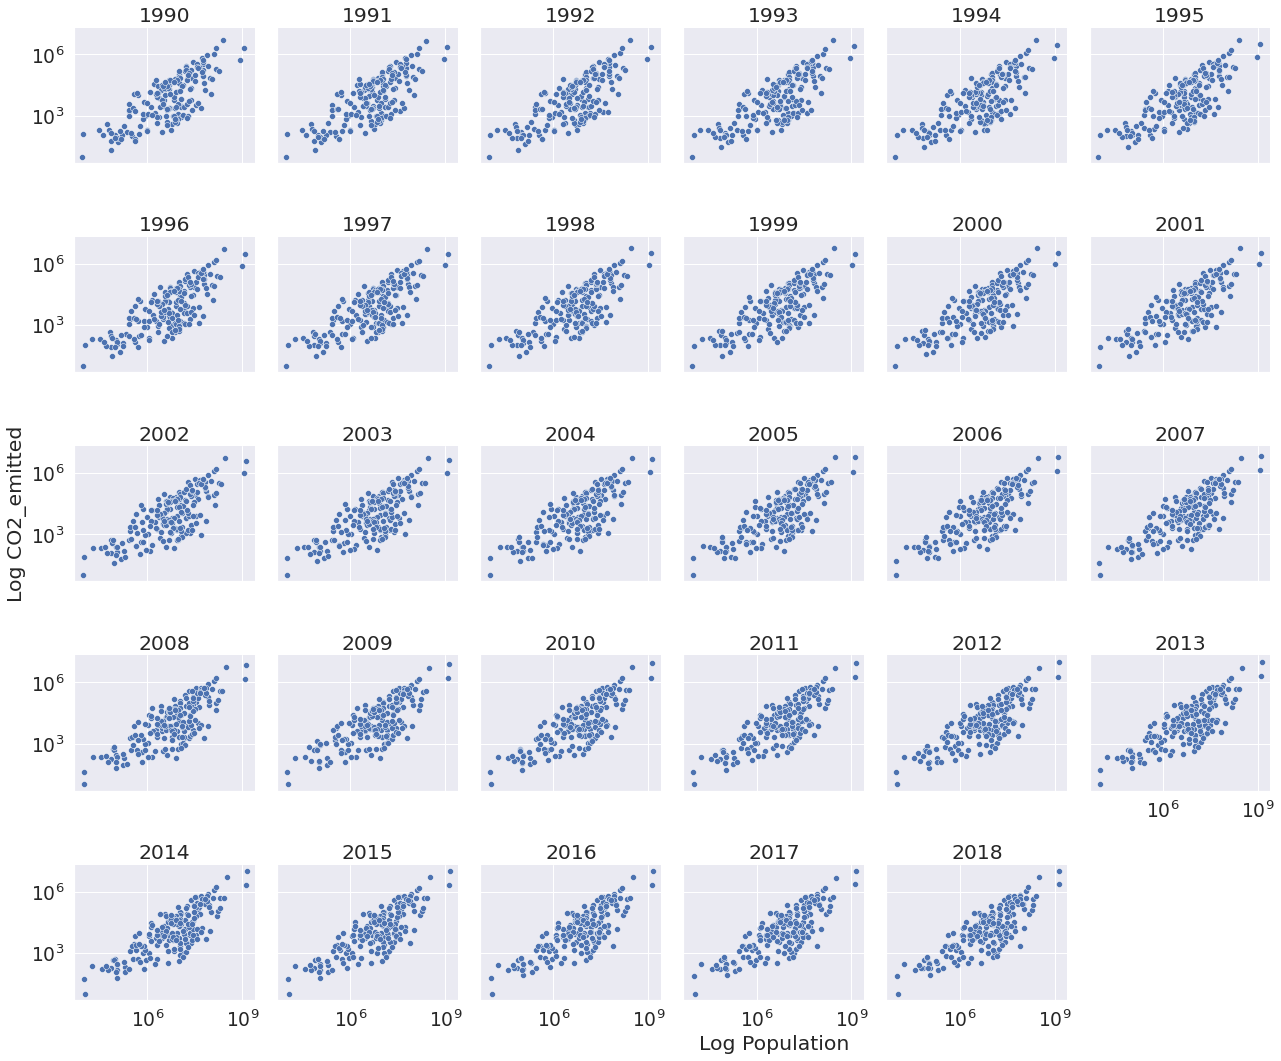

In [ ]:
sns.set(font_scale=1.7)
g = sns.relplot(kind='scatter', data=co_pop_df, x='Population', y='CO2_emitted', col='Year', col_wrap=6, height=3, aspect=1)
# optionally remove the `month=` in the title
for name, ax in g.axes_dict.items():
    ax.set_title(name)
plt.setp(g.axes, xlabel='', ylabel='', xscale="log", yscale="log")  #set x and y log scale
g.axes[-2].set_xlabel('Log Population')
g.axes[12].set_ylabel('Log CO2_emitted') 

plt.subplots_adjust(left=0.06, bottom=0.06)  # set some more spacing at the left and bottom
plt.show()

# Data type consistency

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(projects_df.dtypes)

Project ID                                            object
Project Name                                          object
Voluntary Registry                                    object
ARB \nProject                                         object
Voluntary Status                                      object
Scope                                                 object
 Type                                                 object
Reduction / Removal                                   object
Methodology / Protocol                                object
Region                                                object
Country                                               object
State                                                 object
Project Site Location                                 object
Project Developer                                     object
Total Credits \nIssued                                 int64
Total Credits \nRetired                                int64
Total Credits Remaining 

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(projects_df.isna().any())


Project ID                                    False
Project Name                                   True
Voluntary Registry                            False
ARB \nProject                                 False
Voluntary Status                               True
Scope                                         False
 Type                                         False
Reduction / Removal                           False
Methodology / Protocol                         True
Region                                        False
Country                                       False
State                                          True
Project Site Location                          True
Project Developer                             False
Total Credits \nIssued                        False
Total Credits \nRetired                       False
Total Credits Remaining                       False
First Year of Project                          True
1996                                          False
1997        

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(projects_df.isna().any())


Project ID                                    False
Project Name                                   True
Voluntary Registry                            False
ARB \nProject                                 False
Voluntary Status                               True
Scope                                         False
 Type                                         False
Reduction / Removal                           False
Methodology / Protocol                         True
Region                                        False
Country                                       False
State                                          True
Project Site Location                          True
Project Developer                             False
Total Credits \nIssued                        False
Total Credits \nRetired                       False
Total Credits Remaining                       False
First Year of Project                          True
1996                                          False
1997        

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(projects_df.isna().any())


Project ID                                    False
Project Name                                   True
Voluntary Registry                            False
ARB \nProject                                 False
Voluntary Status                               True
Scope                                         False
 Type                                         False
Reduction / Removal                           False
Methodology / Protocol                         True
Region                                        False
Country                                       False
State                                          True
Project Site Location                          True
Project Developer                             False
Total Credits \nIssued                        False
Total Credits \nRetired                       False
Total Credits Remaining                       False
First Year of Project                          True
1996                                          False
1997        

In [ ]:
projects_df[projects_df['Project Name'].isna()]

Project ID Project Name Voluntary Registry ARB \nProject  \
4671    VCS2240          NaN                VCS            No   

     Voluntary Status             Scope        Type Reduction / Removal  \
4671        Withdrawn  Renewable Energy  RE Bundled           Reduction   

     Methodology / Protocol         Region  ... 2015.3 2016.3 2017.3 2018.3  \
4671                ACM0002  North America  ...      0      0      0      0   

      2019.3  2020.3  2021.3  Notes from Registry  \
4671       0       0       0                  NaN   

      Notes from Berkeley Carbon Trading Project  Date added to database  
4671                                         NaN               v1 4-2021  

[1 rows x 141 columns]

In [ ]:
new_column_names = [re.sub('[^0-9a-z]+', '_', str(i).lower().strip())  for i in projects_df.columns]

In [ ]:
projects_new_col_names_df = projects_df.copy()
projects_new_col_names_df.columns = new_column_names

In [ ]:
cols_to_categorize = ['voluntary_registry', 'arb_project', 'voluntary_status', 'scope', 'type', 'reduction_removal', 'methodology_protocol', 'region', 'country', 'state', 'registry_arb', 'arb_project_detail', 'arb_id', 'ccb_certifications', 'project_type']

In [ ]:
projects_withou_na_df = projects_new_col_names_df.copy()
projects_withou_na_df[cols_to_categorize] = projects_withou_na_df[cols_to_categorize].fillna('not_available')

In [ ]:
projects_withou_na_df.head(2)

project_id              project_name voluntary_registry arb_project  \
0     ACR101            AFOVERT Energy                ACR          No   
1     ACR102  Air Bag Gas Substitution                ACR          No   

  voluntary_status                  scope             type reduction_removal  \
0         Canceled  Household & Community       Cookstoves         Reduction   
1        Completed     Chemical Processes  SF6 Replacement         Reduction   

  methodology_protocol              region  ... 2015_3 2016_3 2017_3 2018_3  \
0        not_available  Sub Saharan Africa  ...      0      0      0      0   
1        not_available       North America  ...      0      0      0      0   

   2019_3  2020_3  2021_3  notes_from_registry  \
0       0       0       0                  NaN   
1       0       0       0                  NaN   

   notes_from_berkeley_carbon_trading_project  date_added_to_database  
0                                         NaN               v1 4-2021  
1                                         NaN               v1 4-2021  

[2 rows x 141 columns]

In [ ]:
projects_with_categories_df = projects_withou_na_df.copy()
projects_with_categories_df[cols_to_categorize] = projects_with_categories_df[cols_to_categorize].astype('category')

In [ ]:
projects_with_categories_df[cols_to_categorize].dtypes

voluntary_registry      category
arb_project             category
voluntary_status        category
scope                   category
type                    category
reduction_removal       category
methodology_protocol    category
region                  category
country                 category
state                   category
registry_arb            category
arb_project_detail      category
arb_id                  category
ccb_certifications      category
project_type            category
dtype: object

In [ ]:
projects_with_categories_df.size

830490

In [ ]:
projects_with_categories_df.drop_duplicates().size

830490

In [ ]:
projects_with_categories_df[cols_to_categorize].dtypes

voluntary_registry      category
arb_project             category
voluntary_status        category
scope                   category
type                    category
reduction_removal       category
methodology_protocol    category
region                  category
country                 category
state                   category
registry_arb            category
arb_project_detail      category
arb_id                  category
ccb_certifications      category
project_type            category
dtype: object

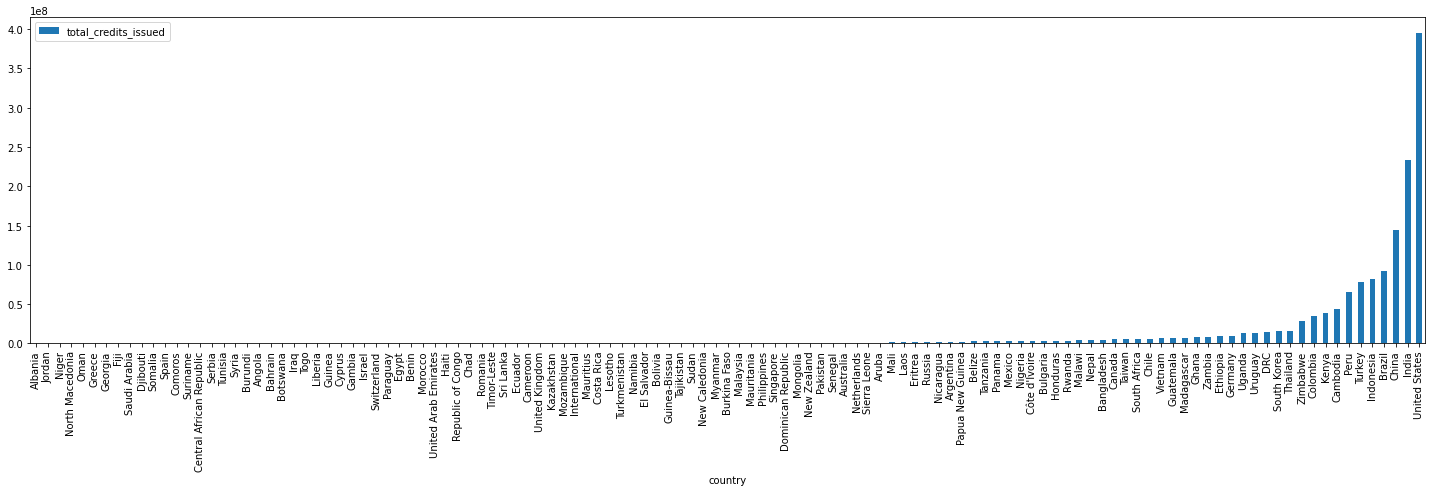

In [ ]:
_=projects_with_categories_df[['total_credits_issued', 'country']].groupby(['country']).sum().sort_values('total_credits_issued').plot(kind='bar', figsize=(25,6))

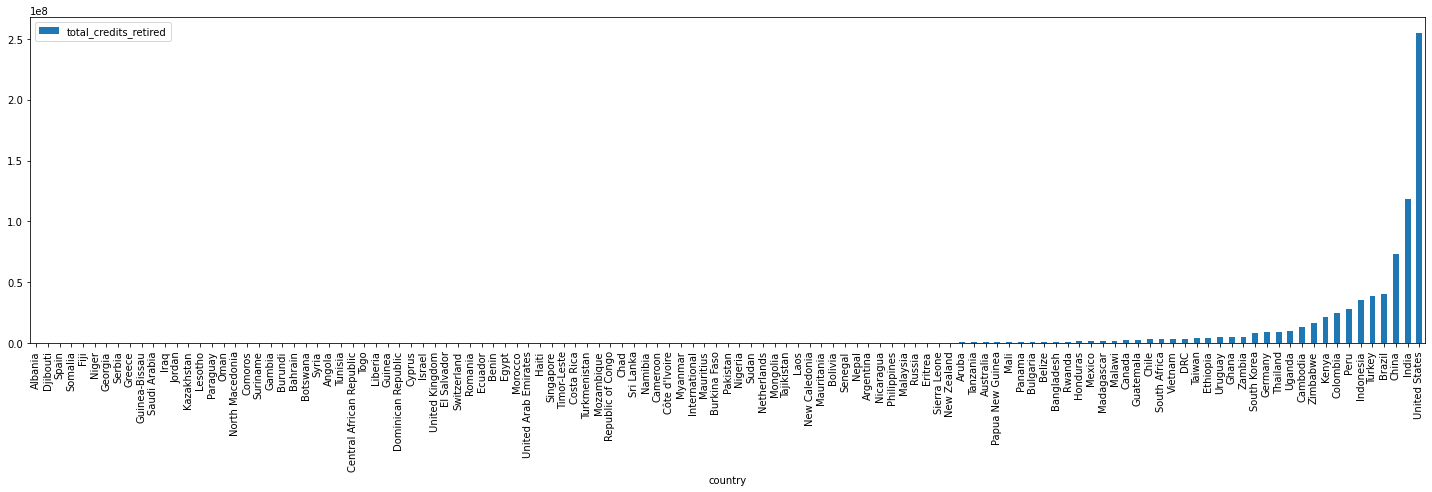

In [ ]:
_=projects_with_categories_df[['total_credits_retired', 'country']].groupby(['country']).sum().sort_values('total_credits_retired').plot(kind='bar', figsize=(25,6))

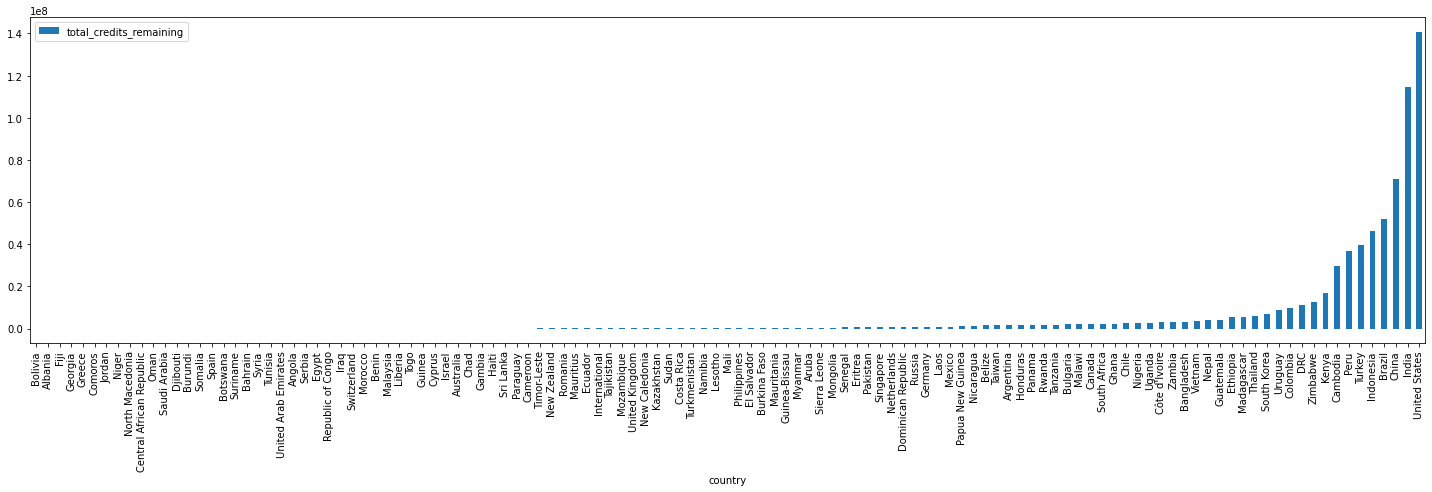

In [ ]:
_=projects_with_categories_df[['total_credits_remaining', 'country']].groupby(['country']).sum().sort_values('total_credits_remaining').plot(kind='bar', figsize=(25,6))

In [ ]:
credit_issued_by_vintage_year_columns = ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
id_columns = ['project_id', 'voluntary_registry','arb_project','voluntary_status','scope','type','reduction_removal','methodology_protocol','region','country','state', 'first_year_of_project', 'project_type']
pro_credit_issued = projects_with_categories_df.reset_index()
pro_credit_issued = pd.melt(pro_credit_issued, 
	id_vars=id_columns, 
	value_vars=credit_issued_by_vintage_year_columns, 
	var_name ='year', 
	value_name ='credits_issued')
pro_credit_issued['year'] = pd.to_datetime(pro_credit_issued['year'], format='%Y').dt.year
pro_credit_issued = pro_credit_issued[(pro_credit_issued['first_year_of_project'].notna())]
pro_credit_issued.head(2)

project_id voluntary_registry arb_project voluntary_status  \
1     ACR102                ACR          No        Completed   
2     ACR103                ACR          No        Completed   

                scope                     type reduction_removal  \
1  Chemical Processes          SF6 Replacement         Reduction   
2         Agriculture  Manure Methane Digester         Reduction   

  methodology_protocol         region        country       state  \
1        not_available  North America  United States      OREGON   
2        not_available  North America  United States  CALIFORNIA   

   first_year_of_project                 project_type  year  credits_issued  
1                 2003.0  Industrial Gas Substitution  1996               0  
2                 2003.0   Livestock Waste Management  1996               0

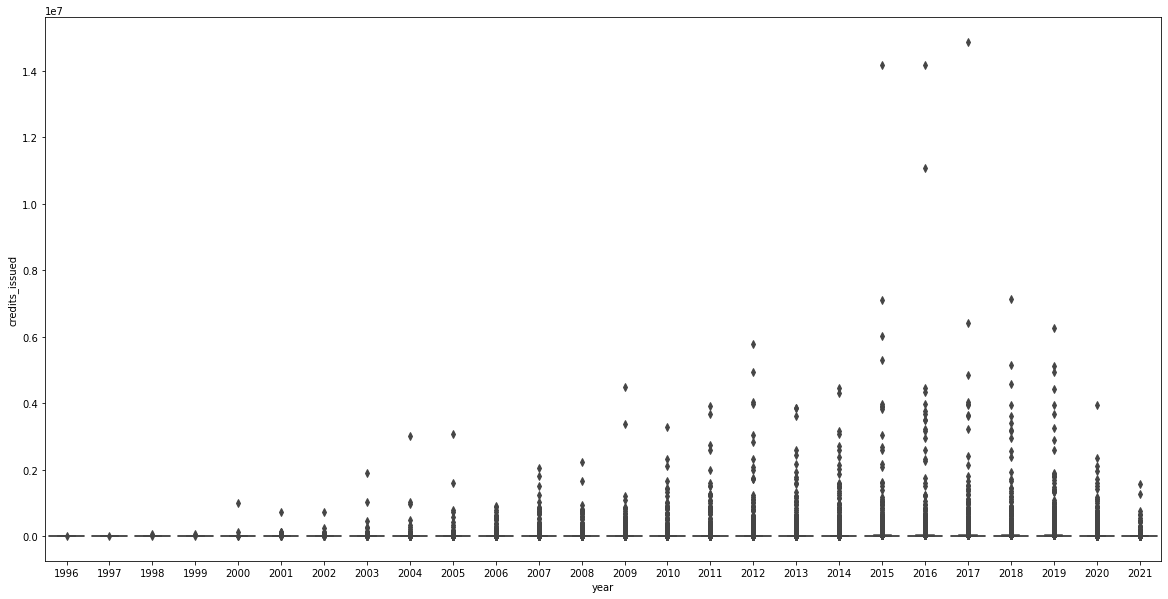

In [ ]:
fig=plt.figure(figsize=(20, 10))
sns.boxplot(data=pro_credit_issued, x='year', y='credits_issued')

[]

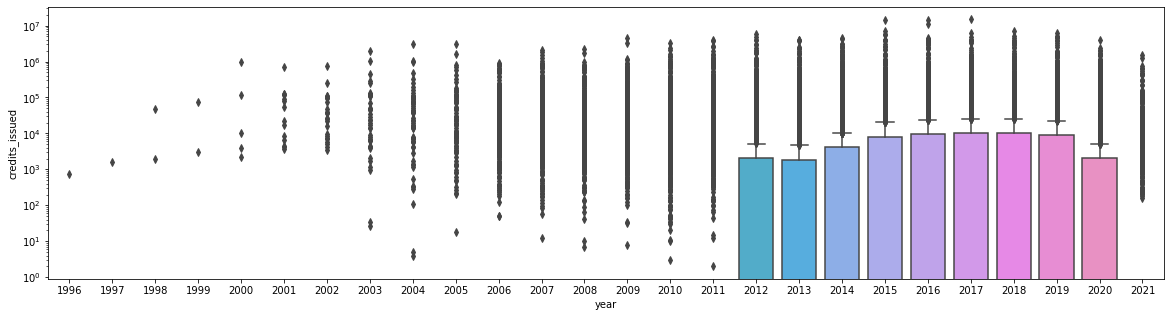

In [ ]:
fig=plt.figure(figsize=(20, 5))
sns.boxplot(data=pro_credit_issued, x='year', y='credits_issued')
plt.semilogy()

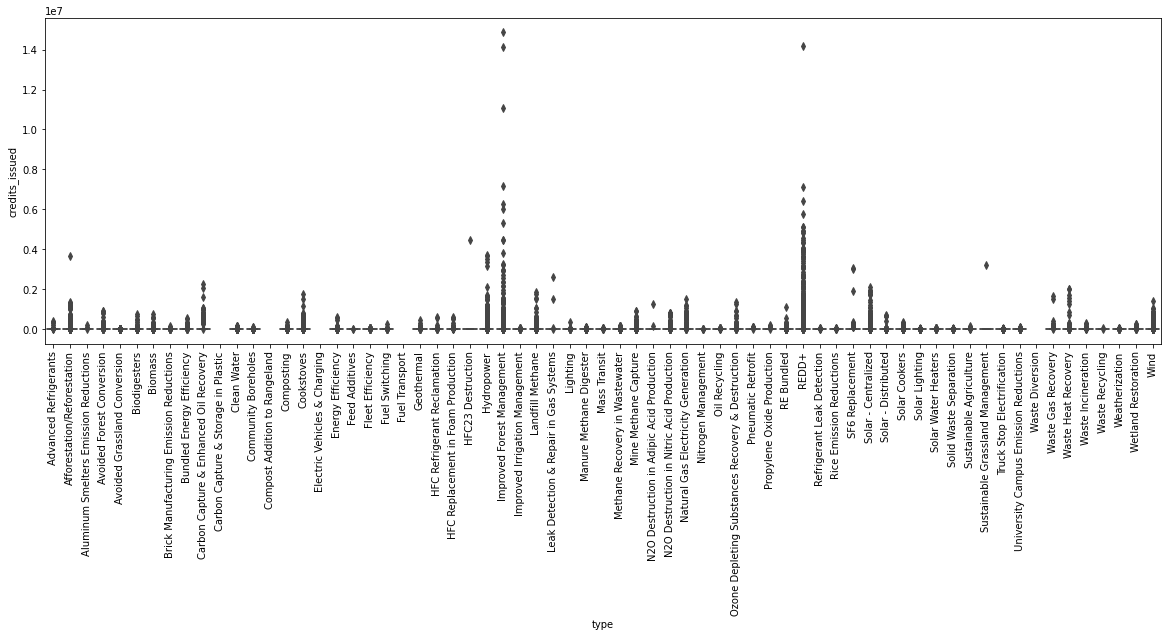

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.boxplot(x="type", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

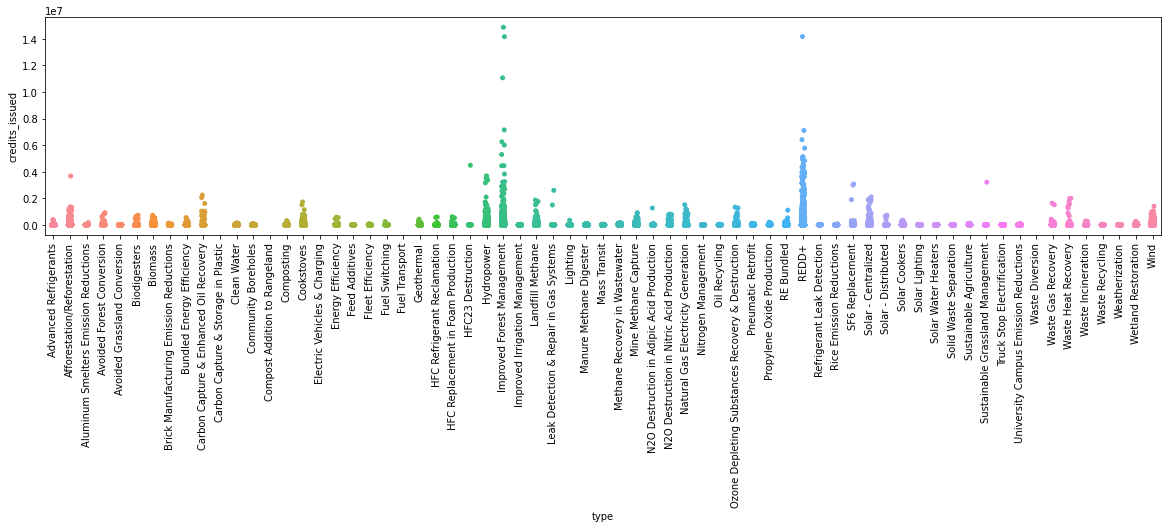

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
_=sns.stripplot(x="type", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)


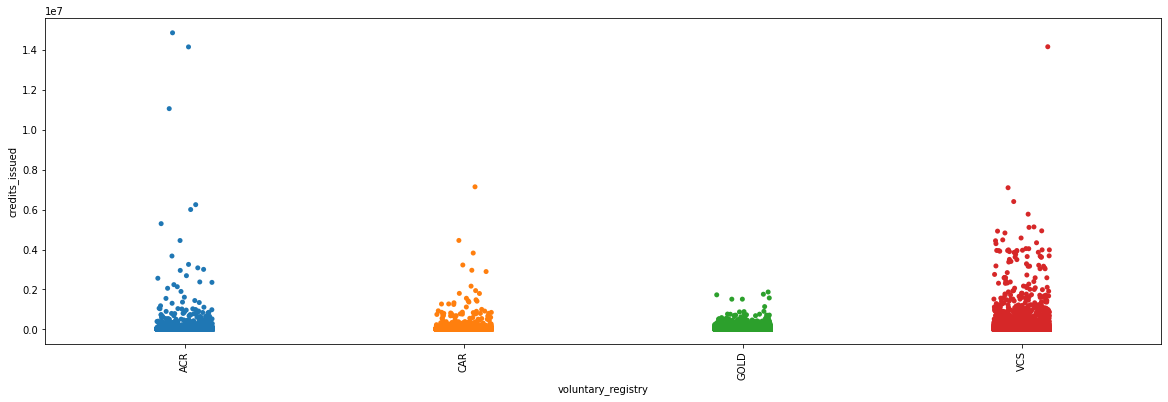

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.stripplot(x="voluntary_registry", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

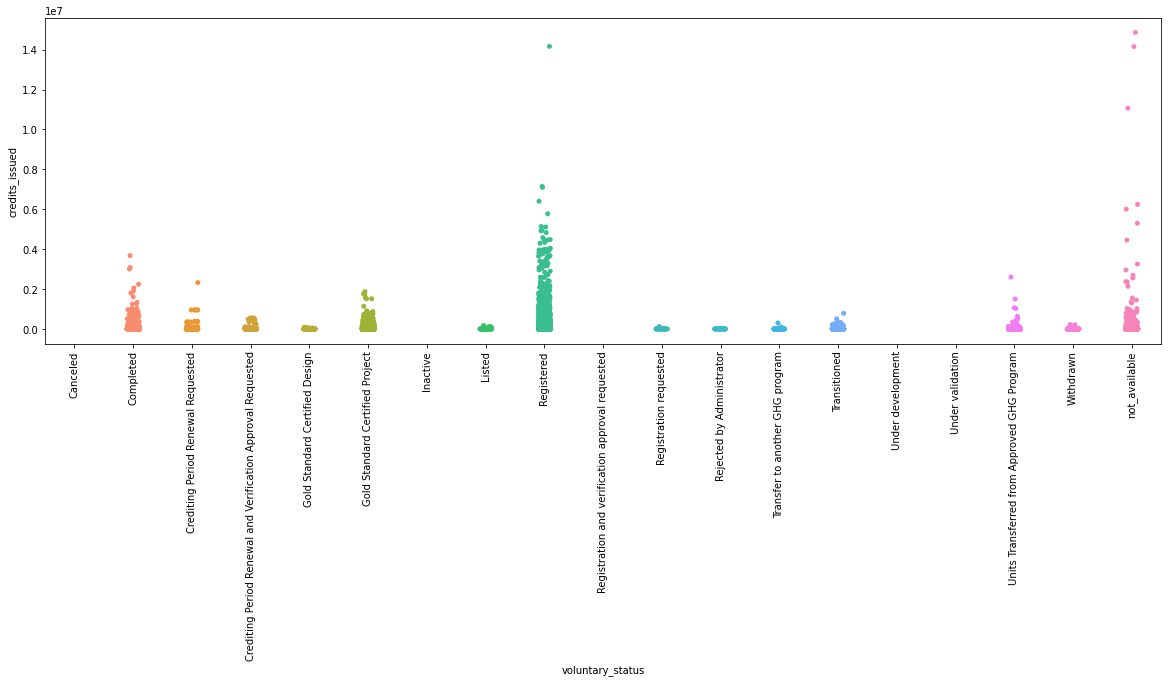

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.stripplot(x="voluntary_status", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

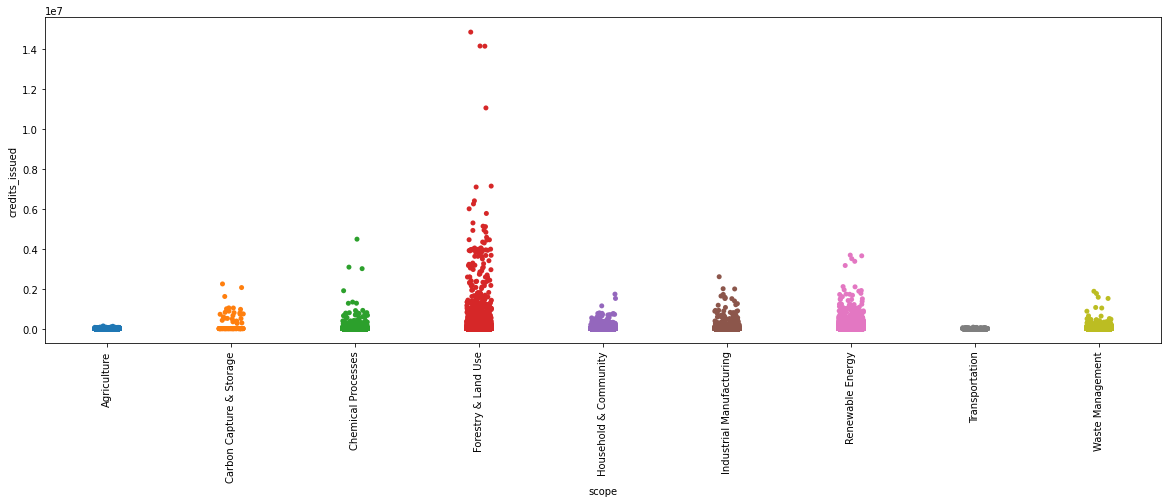

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.stripplot(x="scope", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

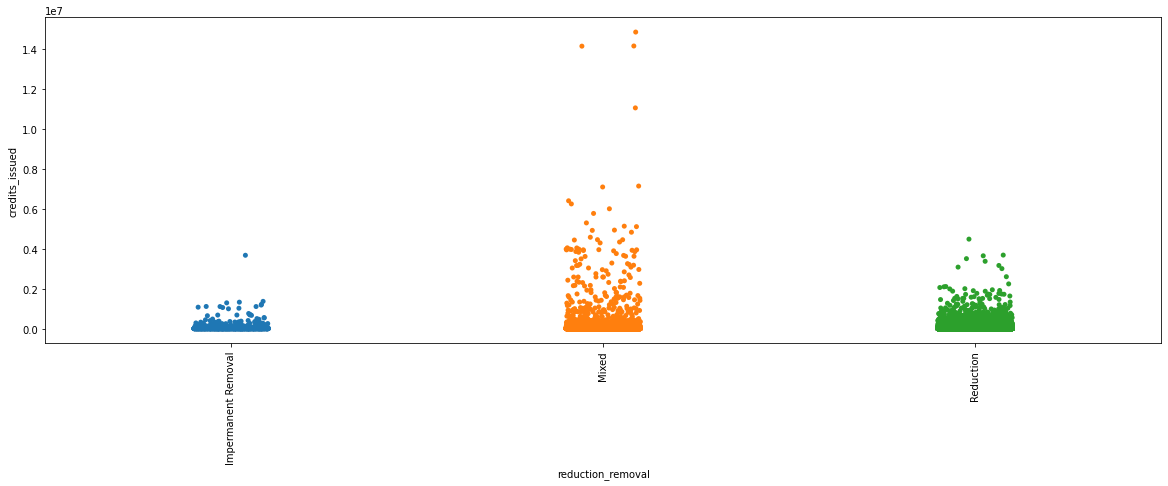

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.stripplot(x="reduction_removal", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

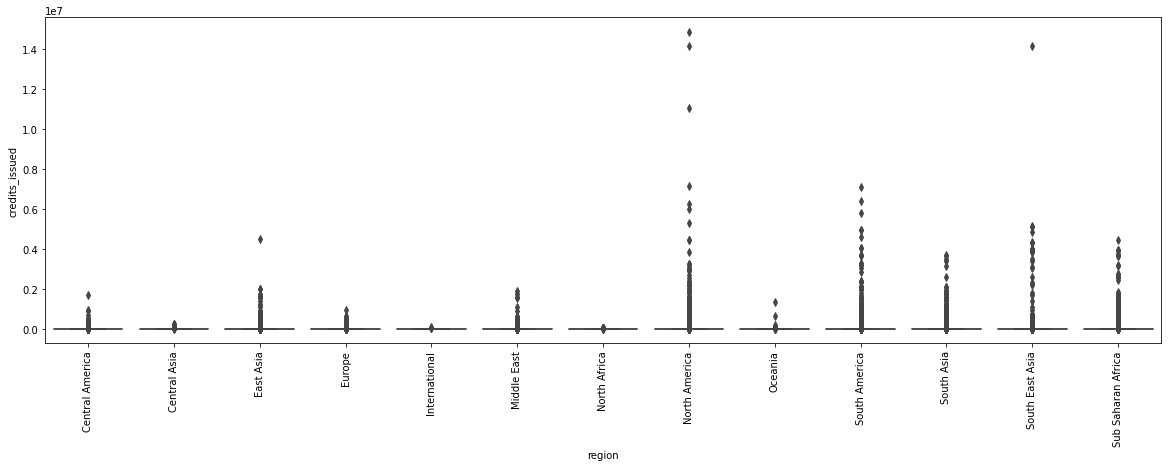

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.boxplot(x="region", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

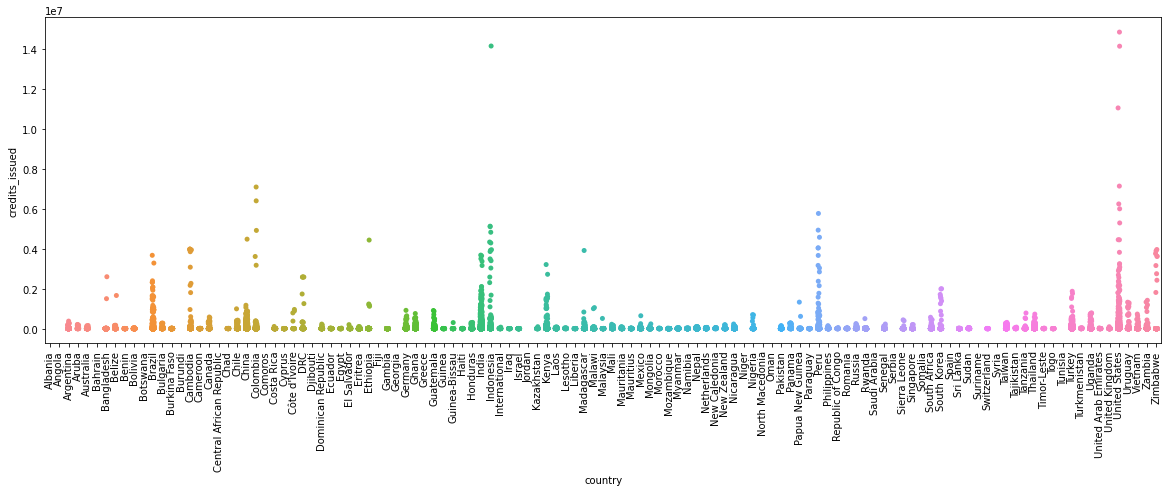

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
_=sns.stripplot(x="country", y="credits_issued", data=pro_credit_issued,  ax=ax)
_=plt.xticks(rotation=90)

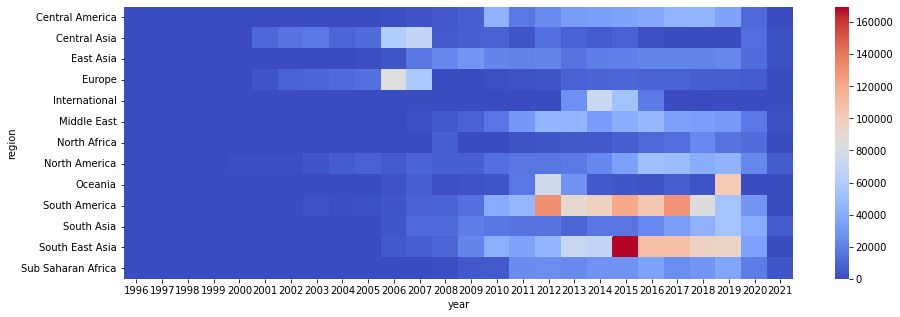

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="region", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(15, 5)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

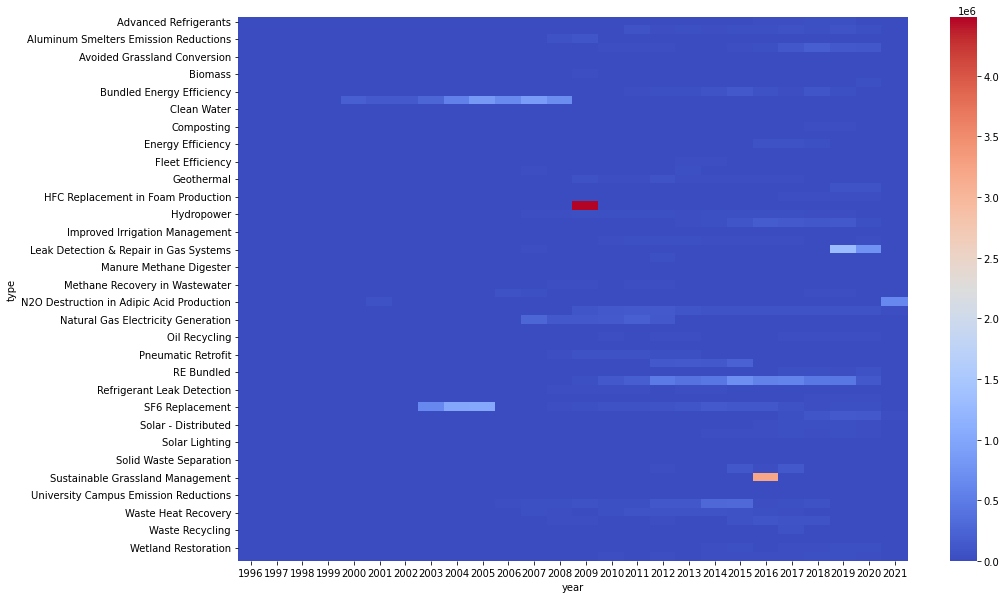

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="type", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(15, 10)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

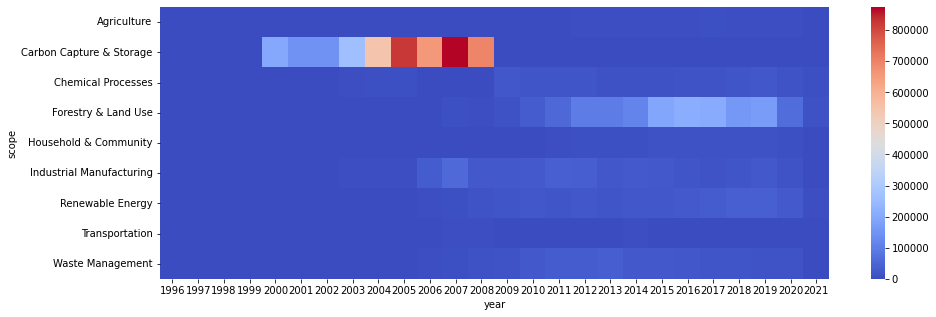

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="scope", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(15, 5)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

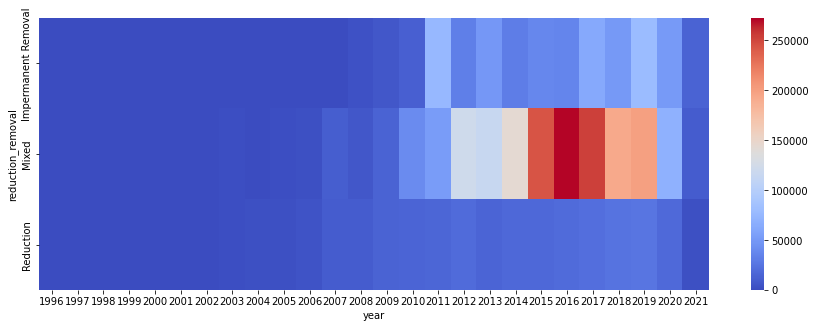

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="reduction_removal", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(15, 5)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

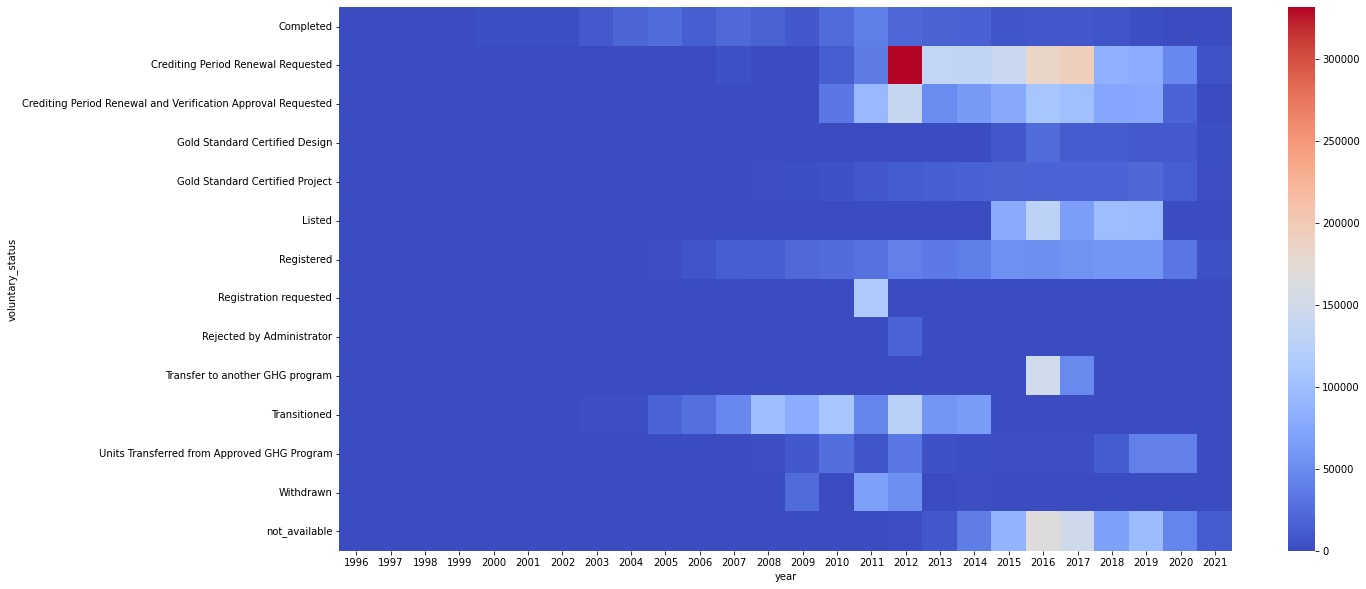

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="voluntary_status", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(20, 10)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

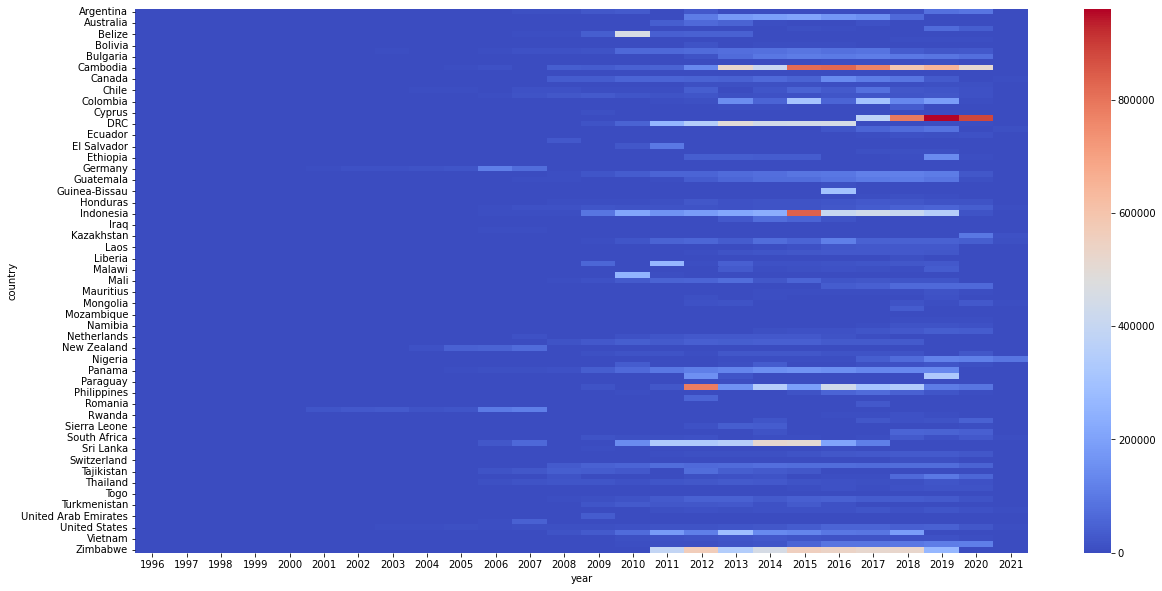

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="country", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(20, 10)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

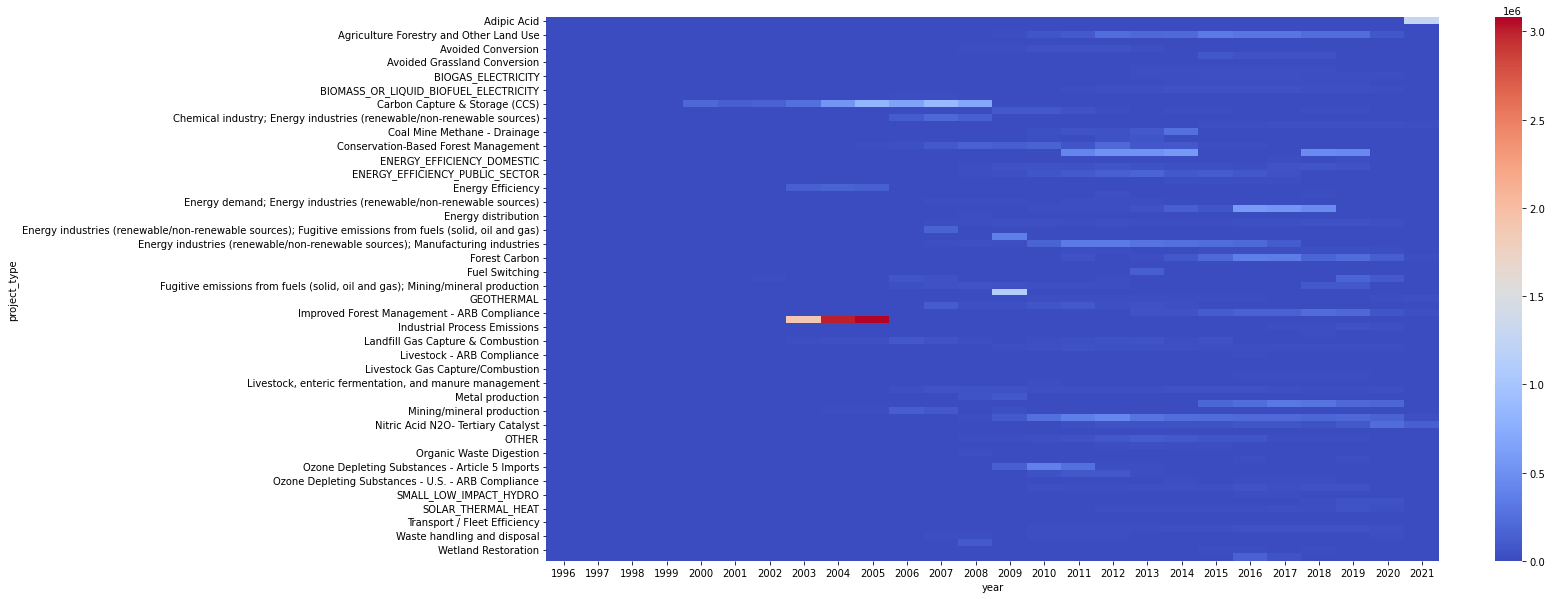

In [ ]:
pivoted_df = pd.pivot_table(data=pro_credit_issued, 
                            index="project_type", 
                            columns="year", values="credits_issued")
plt.figure(figsize=(20, 10)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

In [ ]:
def plot_3d_(dataFrame2, xcol, ycol, zcol, m_figsize=(10,10)):
    """ Taken from https://stackoverflow.com/questions/39125423/how-can-i-plot-a-pandas-multiindex-dataframe-as-3d    """
    df = dataFrame2[[xcol, ycol, zcol]].groupby([xcol, ycol]).sum()
    
    #Grouping similar entries (get_group) occuring in the Sales column and iterating through them and later
    #appending them to a list. This gets stacked horizontally using np.hstack which forms the z dimension of the 3d plot.
    L = []
    for i, group in df.groupby([xcol, ycol])[zcol]:
        L.append(group.values)
    z = np.hstack(L).ravel()
    
    #Letting the labels on both the x and y dimensions take unique values of the respective levels of the 
    # Multi-Index Dataframe. The x and y dimensions then take the range of these values.
    xlabels = df.index.get_level_values(xcol).unique()
    ylabels = df.index.get_level_values(ycol).unique()
    x = np.arange(xlabels.shape[0])
    y = np.arange(ylabels.shape[0])
    
    #Returning coordinate matrices from coordinate vectors using np.meshgrid
    x_M, y_M = np.meshgrid(x, y, copy=False)
    
    #3-D plotting:
    fig = plt.figure(figsize=m_figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Making the intervals in the axes match with their respective entries
    ax.w_xaxis.set_ticks(x + 0.5/2.)
    ax.w_yaxis.set_ticks(y + 0.5/2.)

    # Renaming the ticks as they were before
    ax.w_xaxis.set_ticklabels(xlabels)
    ax.w_yaxis.set_ticklabels(ylabels)

    # Labeling the 3 dimensions
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.set_zlabel(zcol)

    # Choosing the range of values to be extended in the set colormap
    values = np.linspace(0.2, 1., x_M.ravel().shape[0])

    # Selecting an appropriate colormap
    #colors = plt.cm.viridis(values)
    colors = plt.cm.plasma(z/z.max())
    ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.5, dy=0.5, dz=z, color=colors, shade=True)
    #ax.view_init(30, 30)
    #ax.set_box_aspect((100, 10, 1))
    plt.show()
    

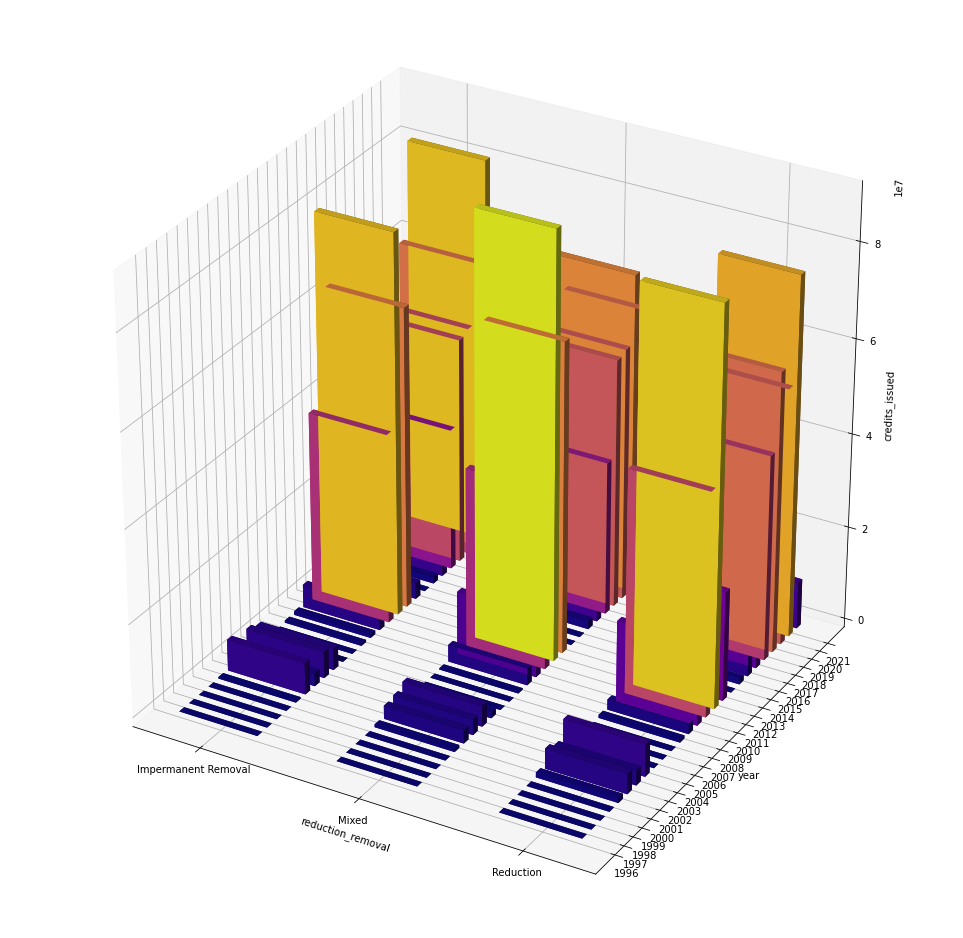

In [ ]:
plot_3d_(pro_credit_issued, 'reduction_removal', 'year', 'credits_issued', m_figsize=(17,17))

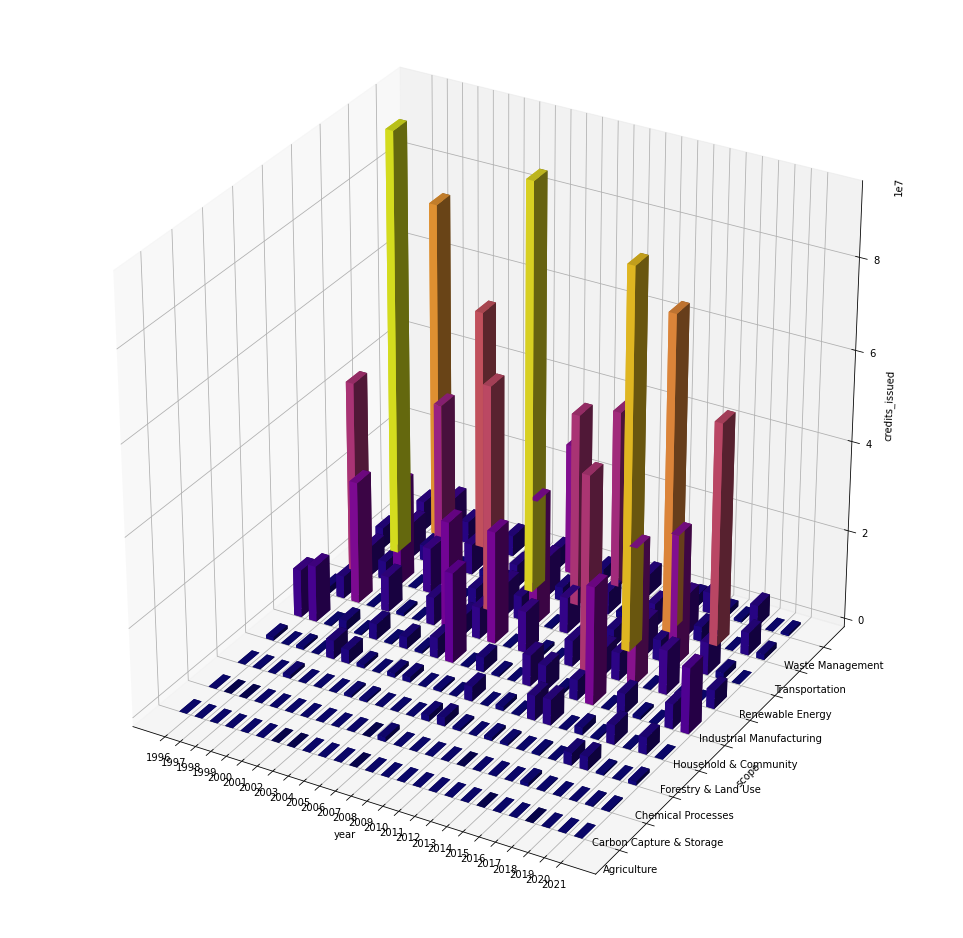

In [ ]:
plot_3d_(pro_credit_issued, 'year', 'scope', 'credits_issued', m_figsize=(17,17))

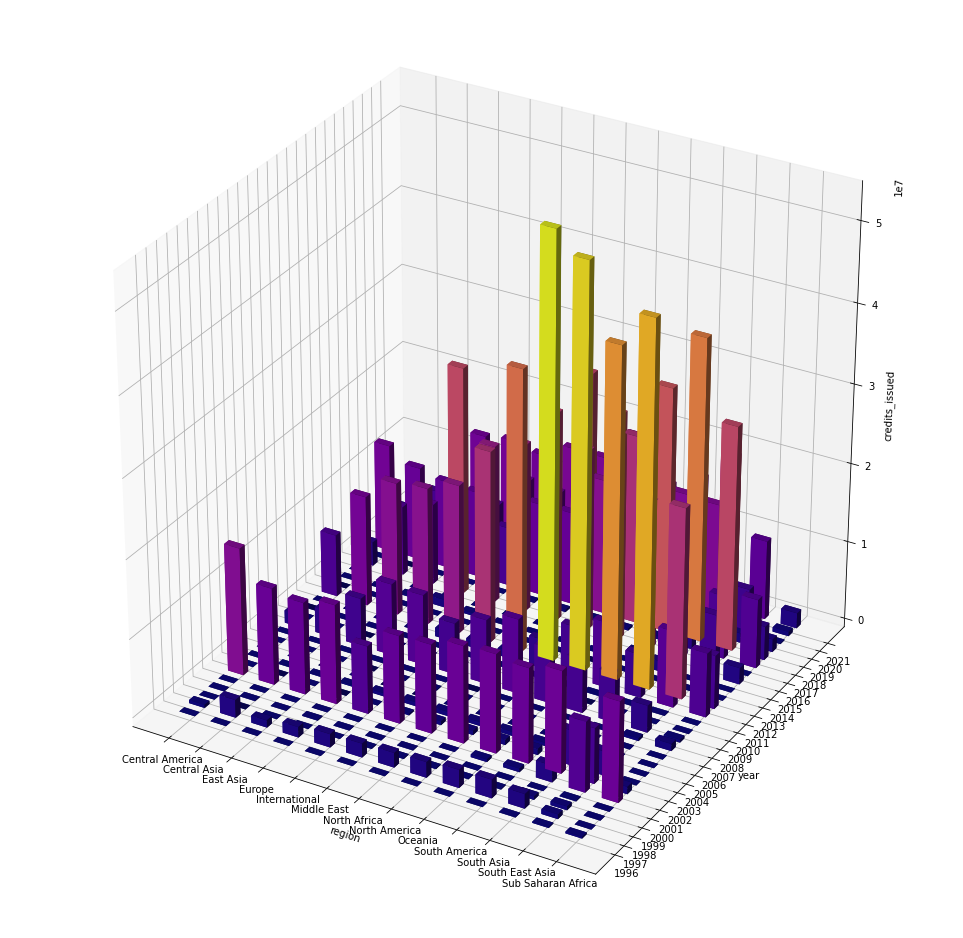

In [ ]:
plot_3d_(pro_credit_issued, 'region', 'year', 'credits_issued', m_figsize=(17,17))

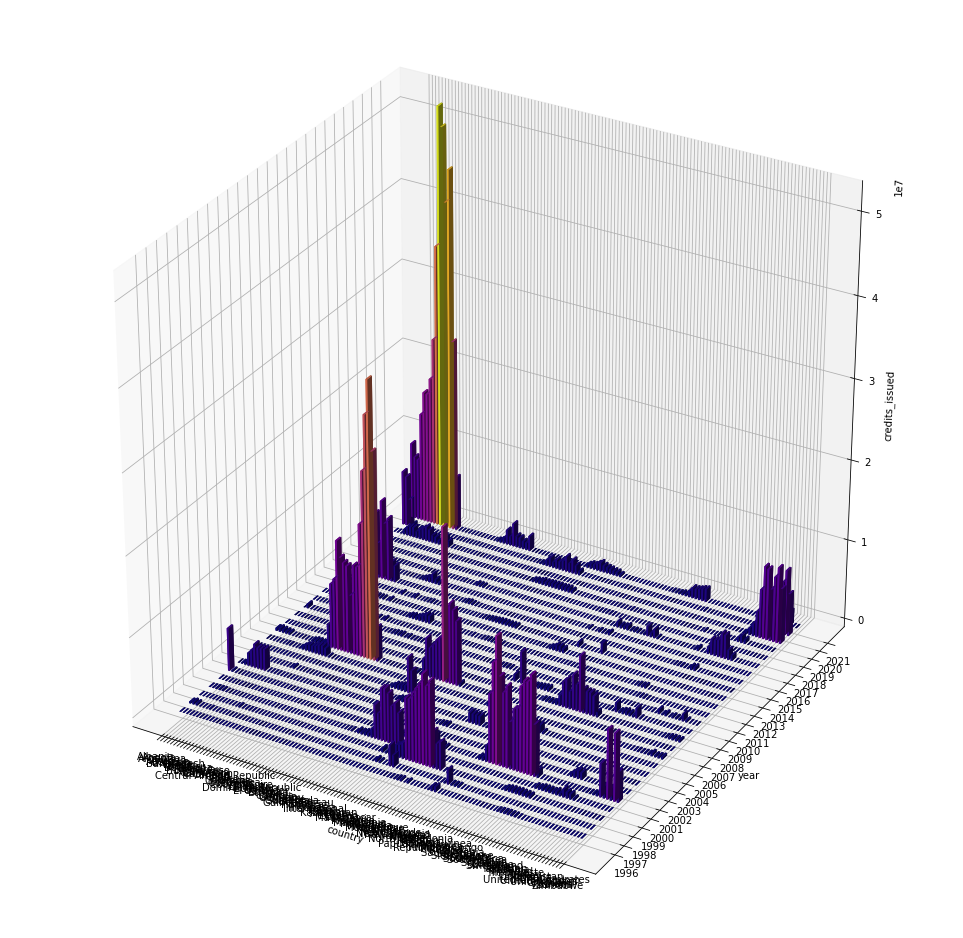

In [ ]:
plot_3d_(pro_credit_issued, 'country', 'year', 'credits_issued', m_figsize=(17,17))

In [ ]:
top_countries = pro_credit_issued[['country', 'credits_issued']].groupby(['country']).sum().drop_duplicates().sort_values('credits_issued').tail(2).reset_index()['country']

In [ ]:
top_countries_df = pro_credit_issued[pro_credit_issued['country'].isin(top_countries)]
top_countries_df.dtypes

project_id                 object
voluntary_registry       category
arb_project              category
voluntary_status         category
scope                    category
type                     category
reduction_removal        category
methodology_protocol     category
region                   category
country                  category
state                    category
first_year_of_project     float64
project_type             category
year                        int64
credits_issued              int64
dtype: object

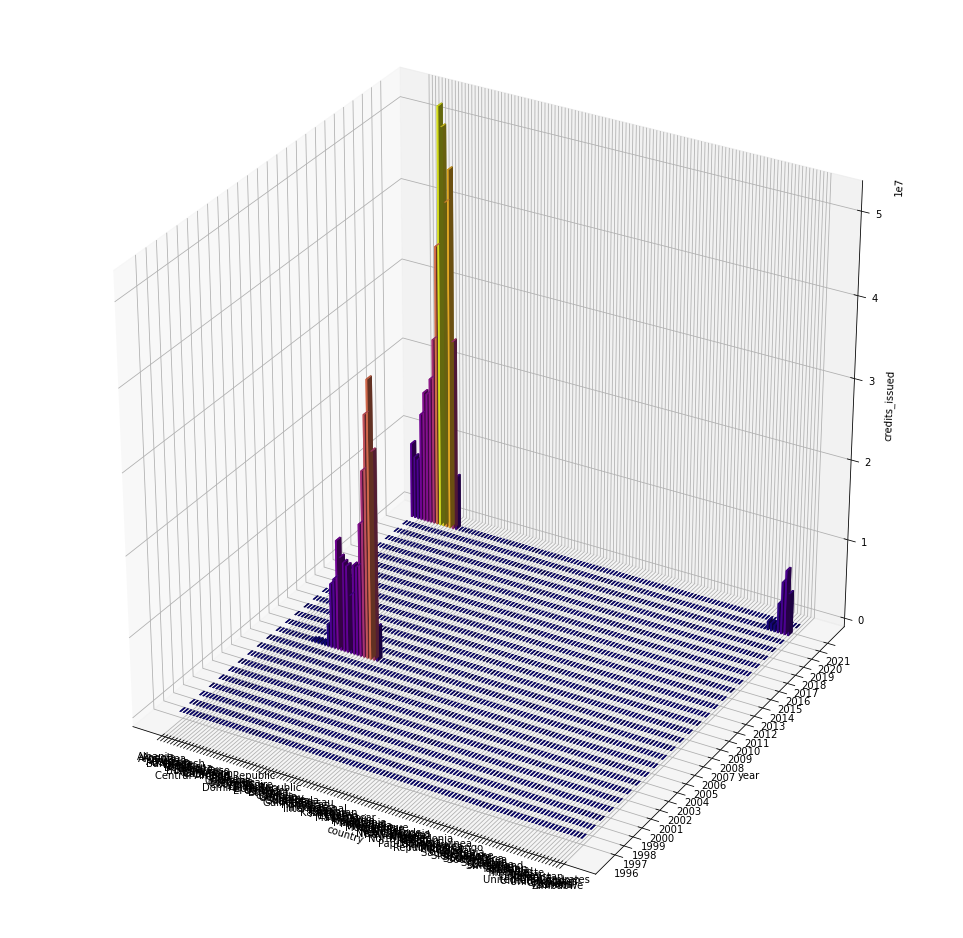

In [ ]:
plot_3d_(top_countries_df, 'country', 'year', 'credits_issued', m_figsize=(17,17))